# Importing Required Libraries :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset :

In [2]:
df=pd.read_csv("globalpowerplant.csv")
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

Above is my dataset and i have some numerical columns and some categorical columns.

In [3]:
#We have to predict two things :
    # 1) Primary fuel i.e. categorical column so it is classification problem.
    # 2) capacity_mw i.e. continuous column so it is regression problem.

# Exploratory Data Analysis(EDA)

In [4]:
# Checking No of Rows and columns :
    
df.shape  

(907, 27)

In [5]:
# First 5 rows of dataset :
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [6]:
# Last 5 rows of dataset :
df.tail()

country country_long                          name   gppd_idnr  \
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
902            0.994875           233.59665               865.4   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
902                686.5                  NaN  Central Electricity Authority   
903                  NaN                  NaN                            NaN   
904                  NaN                  NaN                            NaN   
905                  NaN                  NaN                            NaN   
906                  NaN                  NaN                            NaN   

     estimated_generation_gwh  
902                       NaN  
903                       NaN  
904                       NaN  
905                       NaN  
906                       NaN  

[5 rows x 27 columns]

In [7]:
# Checking columns name:

df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [8]:
# Checking datatypes of all columns :

df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

There are 12 object and 13 numerical columns in data

In [9]:
# checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

It gives the information about the dataset which includes indexing type, column type,null values and memory usage.

In [10]:
# Checking Unique Values of each columns

df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Since country, country_long , year_of_capacity_data have only 1 unique values means data same so I am removing these columns..
Name, url is also of no use so can remove these also.

In [11]:
df.drop(['country', 'country_long', 'year_of_capacity_data','name','url'],axis=1,inplace=True)

In [12]:
# Checking Missing values in dataset :

df.isnull().sum()

gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
geolocation_source           19
wepp_id                     907
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

we are going to remove some columns those having maximum no of null values because if we fill those values prediction will not correct

In [13]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2','generation_gwh_2013','generation_gwh_2019'  ],axis=1,inplace=True)

In [14]:
# We can remove unwanted columns :

df.drop(['gppd_idnr','owner','generation_data_source'],axis=1,inplace=True)   

In [15]:
# Now checking Null Values :

df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

Now we fill categorical values with mode and continuous values with mean/median

In [16]:
# filling null values with median in numerical columns

df.fillna(df.median(), inplace=True)

In [17]:
# Checking again null values :

df.isnull().sum()

capacity_mw             0
latitude                0
longitude               0
primary_fuel            0
commissioning_year      0
source                  0
geolocation_source     19
generation_gwh_2014     0
generation_gwh_2015     0
generation_gwh_2016     0
generation_gwh_2017     0
generation_gwh_2018     0
dtype: int64

In [18]:
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [19]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

Now there are no null values so we proceed

# Heatmap of null values

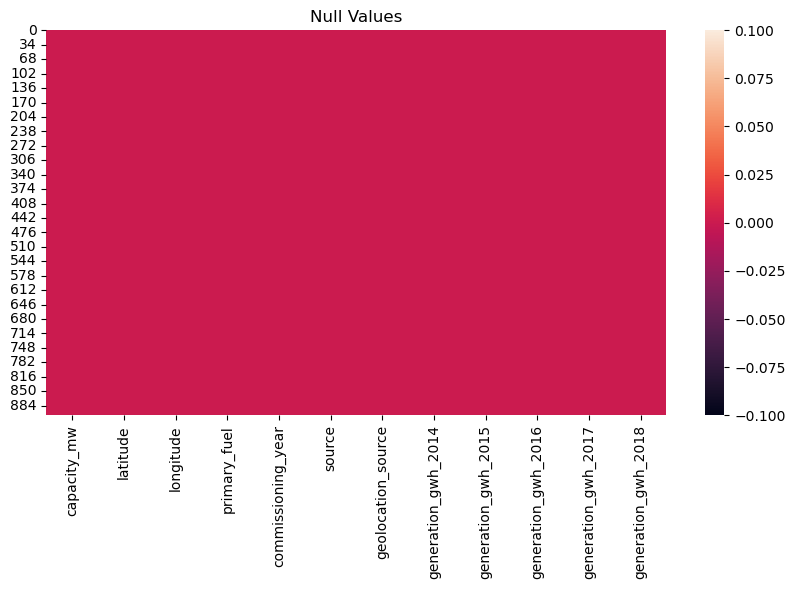

In [20]:
# lets visualize the null values clearly

plt.figure(figsize=[10,5])
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

I can see in graph that there is no null values in the given dataset.

In [21]:
# checking the uniqueness of Target Variable :

df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

There are 8 unique values in target variable.

In [22]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [23]:
# checking whether the dataset contains any space

df.loc[df['primary_fuel']==" "]

Empty DataFrame
Columns: [capacity_mw, latitude, longitude, primary_fuel, commissioning_year, source, geolocation_source, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018]
Index: []

It seems that there are no spaces in the dataset.

# Data Analysis and Visulization

Statistical measure of dataset :

In [24]:
df.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  907.000000  907.000000          907.000000   
mean    326.223755   21.227439   77.427103         1998.728776   
std     590.085456    6.080491    4.815073           13.158621   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   17.072000   74.388900         1998.000000   
50%      59.200000   21.780000   76.719500         2001.000000   
75%     385.250000   25.176450   79.206100         2003.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count           907.000000           907.000000           907.000000   
mean           1516.689956          1510.071296          1565.361383   
std            2785.604307          2984.994556          3005.087210   
min               0.000000             0.000000             0.000000   
25%             801.123775           711.181225           737.205450   
50%             801.123775           711.181225           737.205450   
75%             801.123775           711.181225           737.205450   
max           28127.000000         30539.000000         30015.000000   

       generation_gwh_2017  generation_gwh_2018  
count           907.000000           907.000000  
mean           1657.121797          1665.011030  
std            3046.862910          3168.826750  
min               0.000000             0.000000  
25%             817.977250           751.644375  
50%             817.977250           751.644375  
75%             817.977250           751.644375  
max           35116.000000         35136.000000

All statistical data of all rows shown for each parameters like mean, minimum, maximum , 25th percentile means how much value for each column are below 25th percentile ,similarly for 50th perecntile and 75th perecntile.

In [25]:
#want to describe along categorical data

df.describe(include=['O'])

primary_fuel                         source geolocation_source
count           907                            907                907
unique            8                            191                  3
top            Coal  Central Electricity Authority                WRI
freq            258                            519                784

# Finding Columns as (Categorical) V/S (Numerical) Columns

In [26]:
# Separating categorical columns :

categorical_columns=[]

for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['primary_fuel', 'source', 'geolocation_source']


Here, we found out list of categorical columns.

In [27]:
# Separating numerical columns:

numerical_columns=[]

for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


# Data Visualization

Univariate Analysis

In [28]:
## Plotting Count Plot for categorical columns 

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


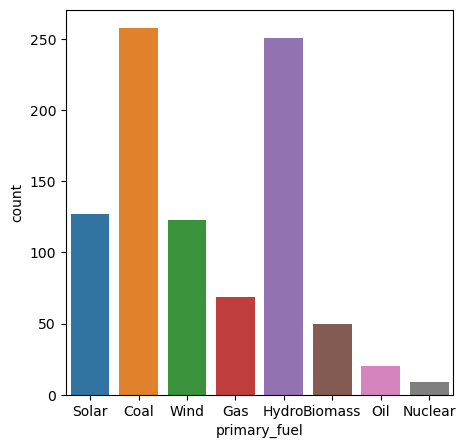

In [29]:
# # visualizing the primary_fuel

print(df["primary_fuel"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot(x="primary_fuel",data=df)
plt.show()

Individual fuel types with respective counts shown. Coal is maximum in all.

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64


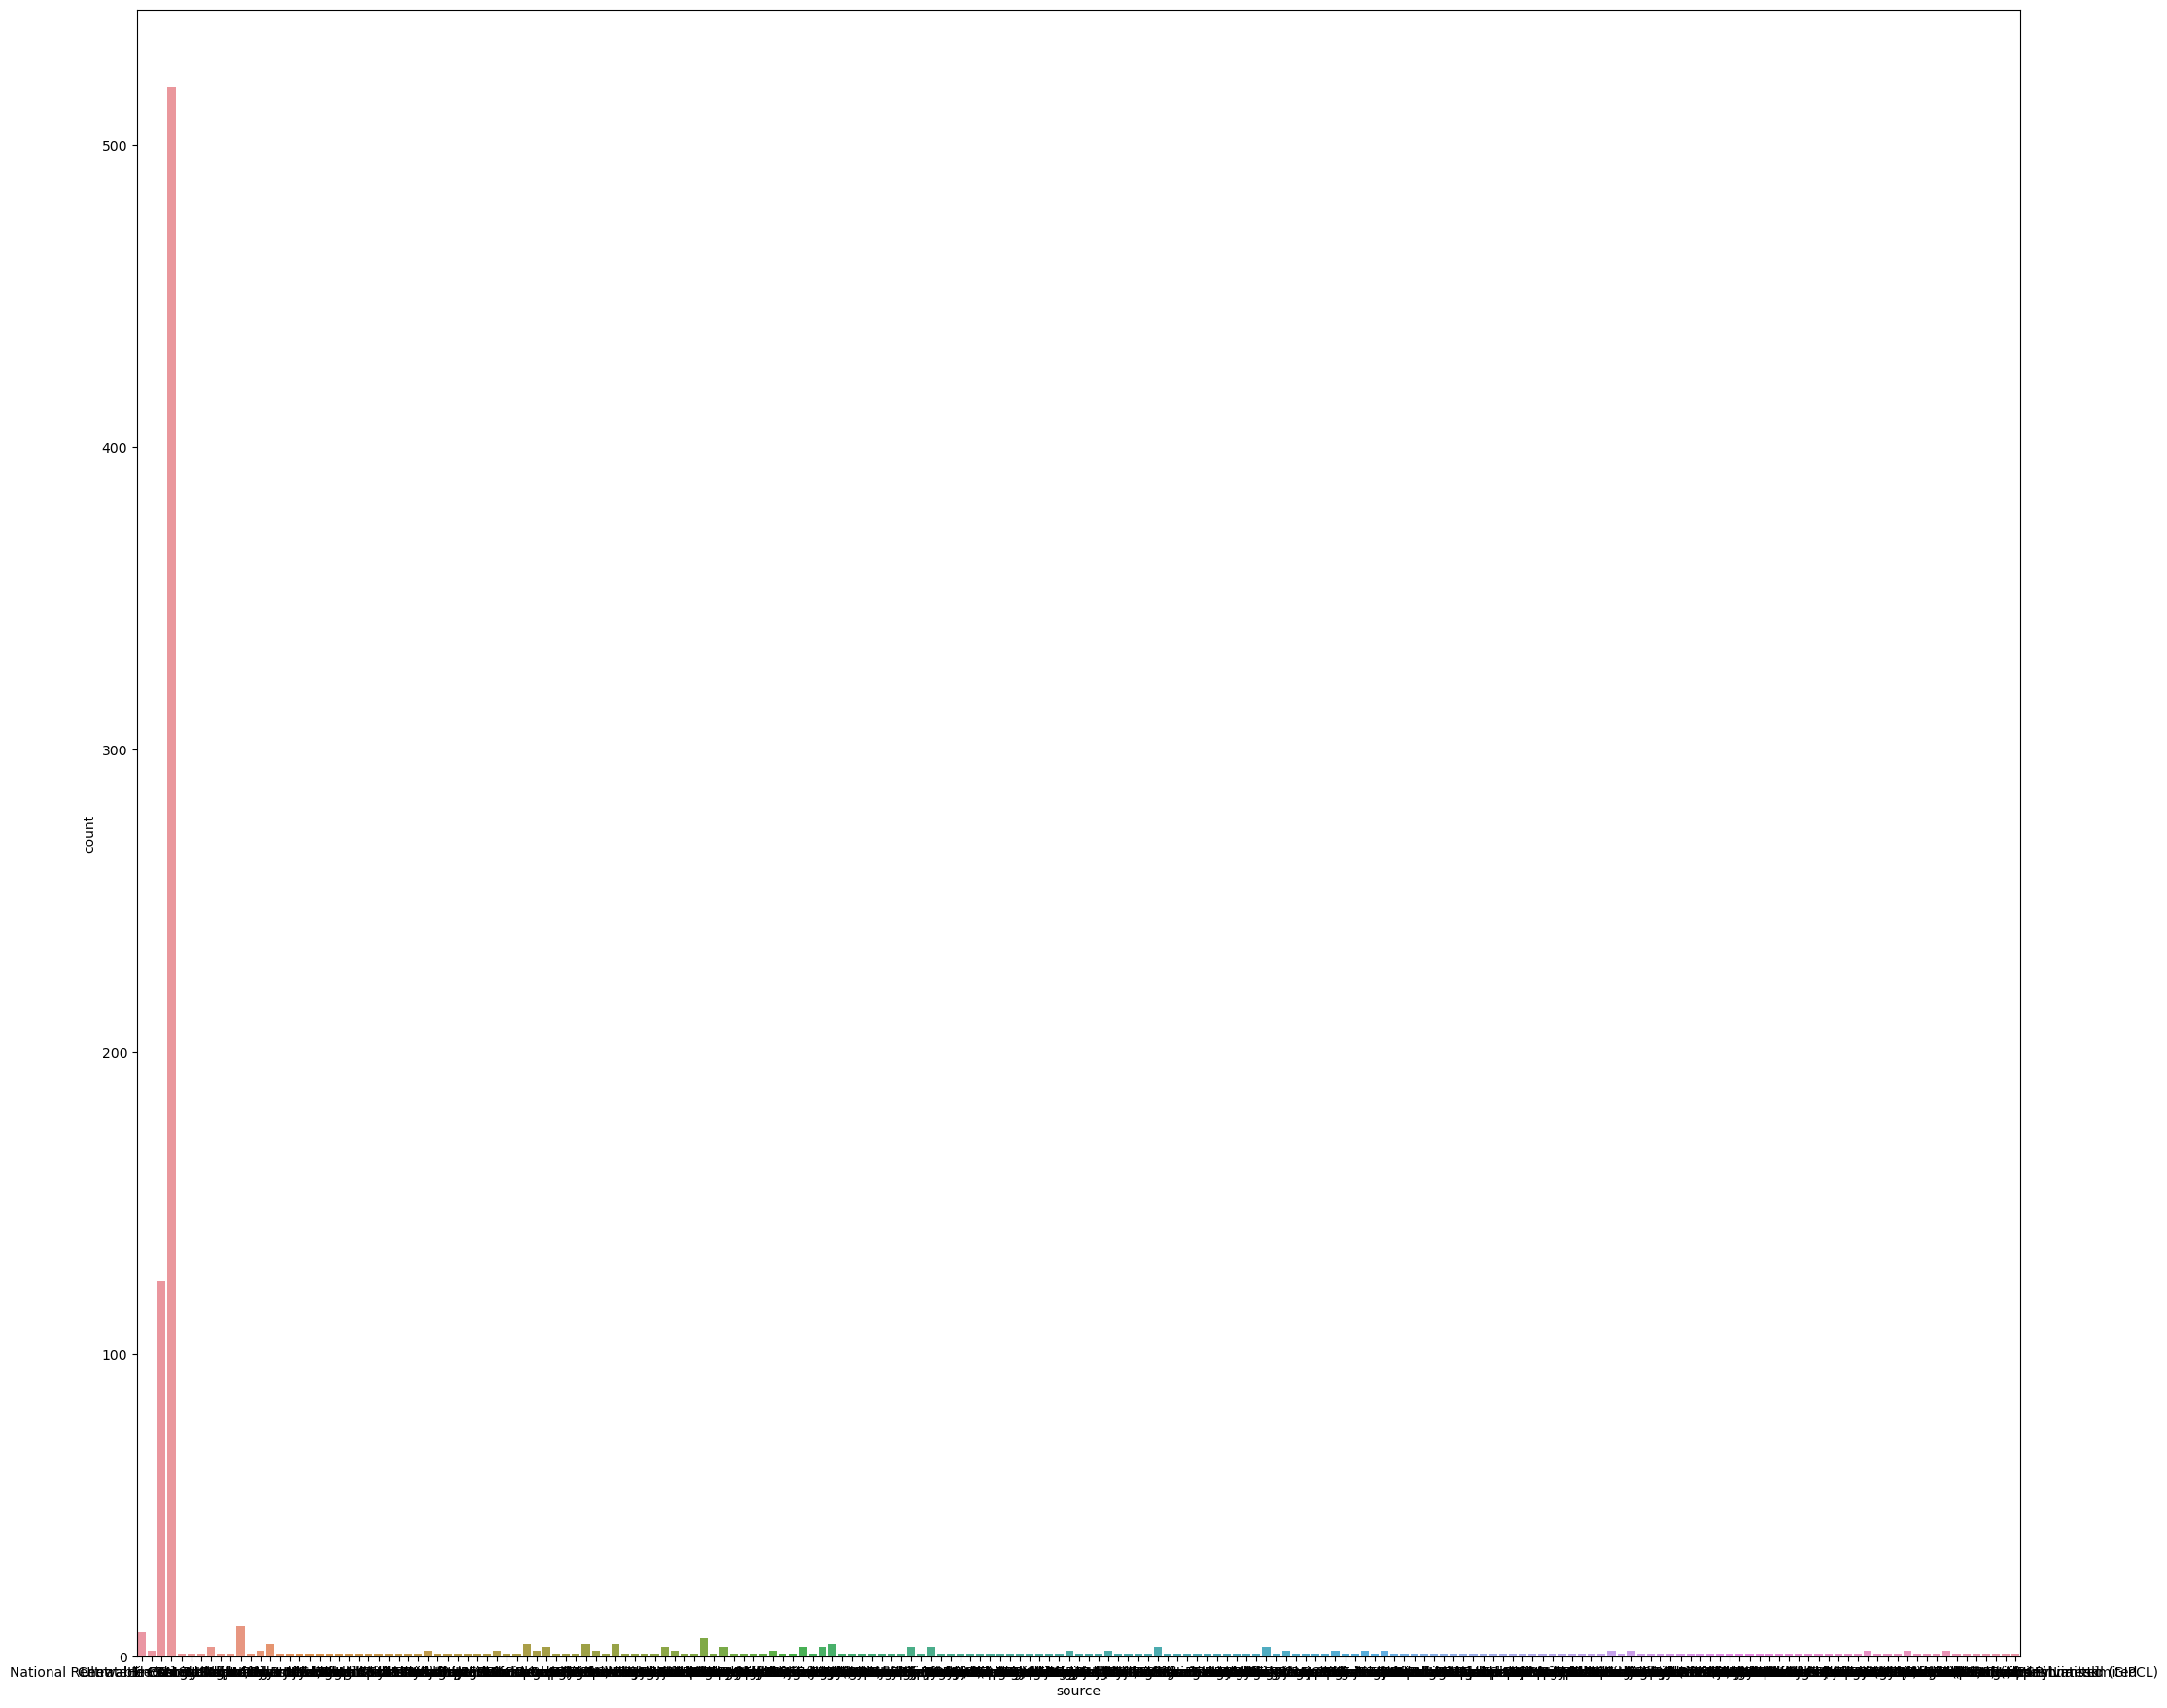

In [207]:
# # visualizing the source

print(df["source"].value_counts())
plt.figure(figsize=(25,22))
sns.countplot(x="source",data=df)
plt.show()

Individual sources with respective counts shown. 

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


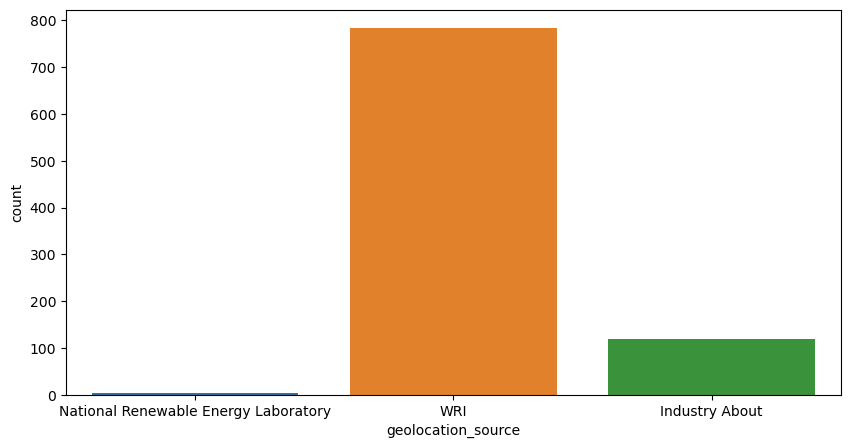

In [208]:
# # visualizing the geolocation_source

print(df["geolocation_source"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x="geolocation_source",data=df)
plt.show()

WRI has maximum value followed by Industry about.

In [209]:
## Ditribution/Density plot for Numerical Data

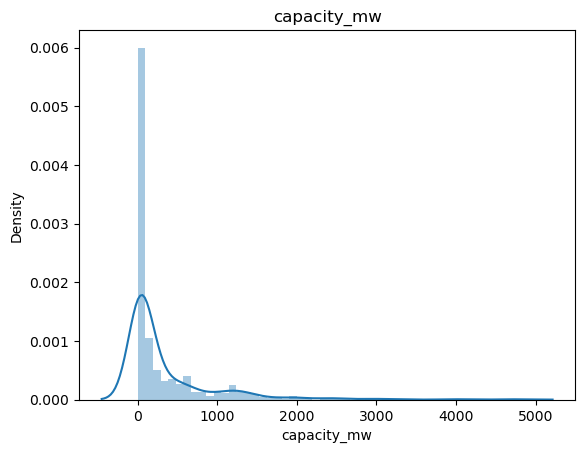

In [33]:
# Distribution Plot for capacity_mw :
    
sns.distplot(df['capacity_mw'])
plt.title("capacity_mw")
plt.show()

There is no skewness present.

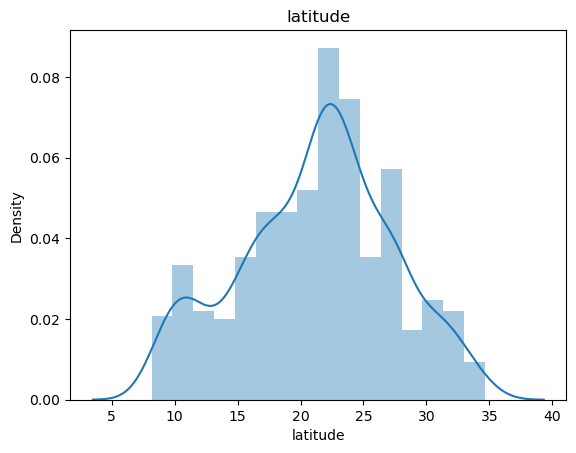

In [34]:
# Distribution Plot for latitude :
    
sns.distplot(df['latitude'])
plt.title("latitude")
plt.show()

There is skewness present.

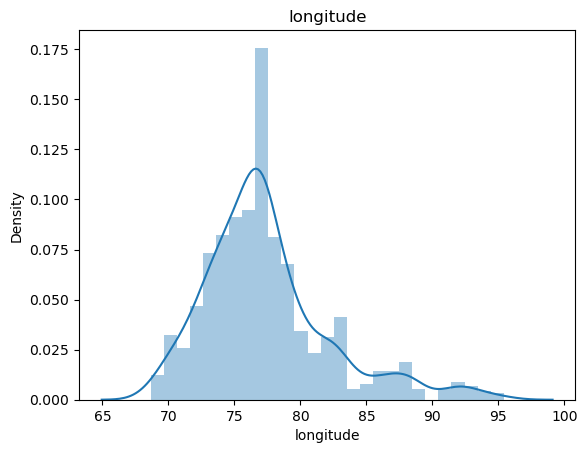

In [35]:
# Distribution Plot for longitude :
    
sns.distplot(df['longitude'])
plt.title("longitude")
plt.show()

There is no skewness present.

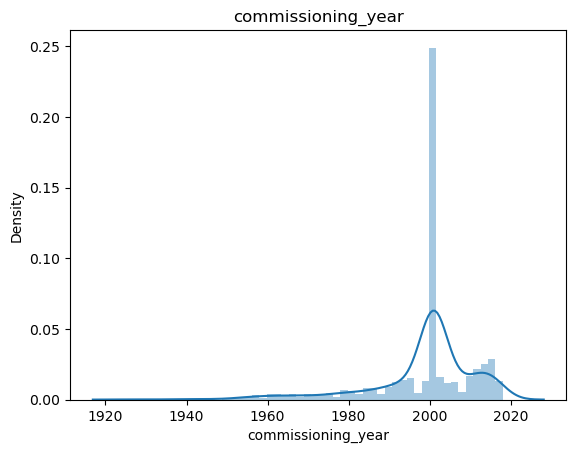

In [36]:
# Distribution Plot for commissioning_year :
    
sns.distplot(df['commissioning_year'])
plt.title("commissioning_year")
plt.show()

There is no skewness present.

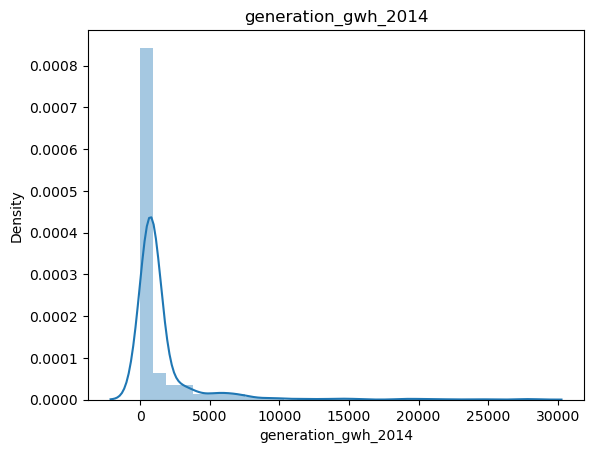

In [37]:
# Distribution Plot for generation_gwh_2014 :
    
sns.distplot(df['generation_gwh_2014'])
plt.title("generation_gwh_2014")
plt.show()

There is no skewness present.

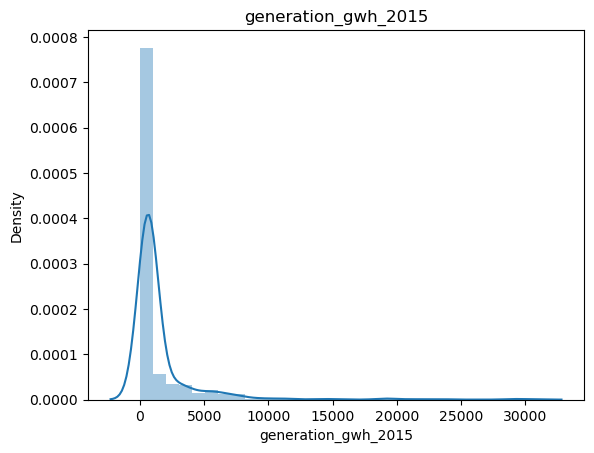

In [38]:
# Distribution Plot for generation_gwh_2015 :
    
sns.distplot(df['generation_gwh_2015'])
plt.title("generation_gwh_2015")
plt.show()

There is no skewness present.

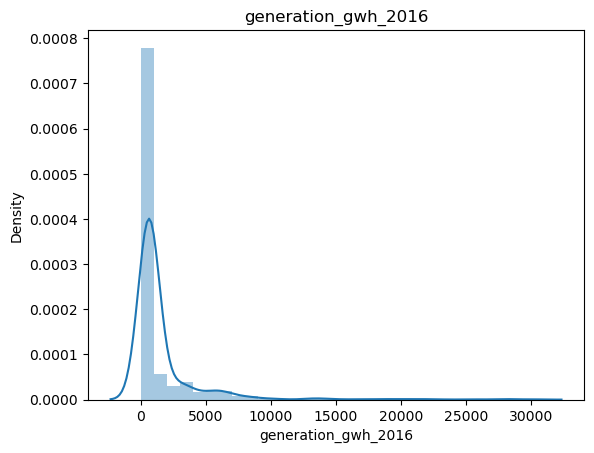

In [39]:
# Distribution Plot for generation_gwh_2016 :
    
sns.distplot(df['generation_gwh_2016'])
plt.title("generation_gwh_2016")
plt.show()

There is no skewness present.

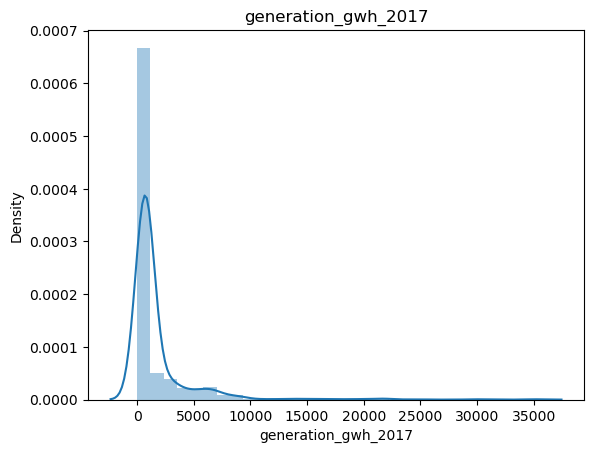

In [40]:
# Distribution Plot for generation_gwh_2017 :
    
sns.distplot(df['generation_gwh_2017'])
plt.title("generation_gwh_2017")
plt.show()

There is no skewness present.

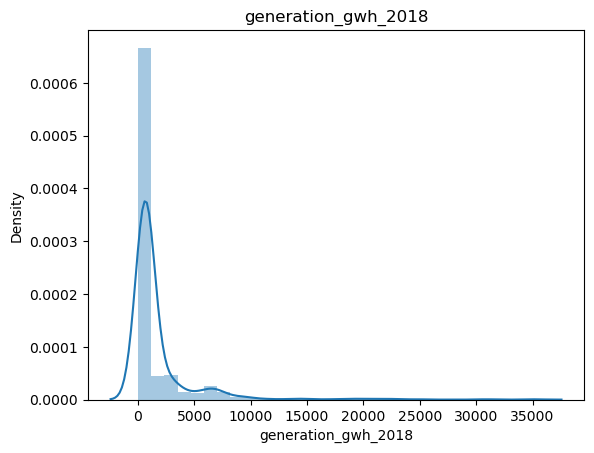

In [41]:
# Distribution Plot for generation_gwh_2018 :
    
sns.distplot(df['generation_gwh_2018'])
plt.title("generation_gwh_2018")
plt.show()

There is no skewness present.

# Bivariate Analysis :

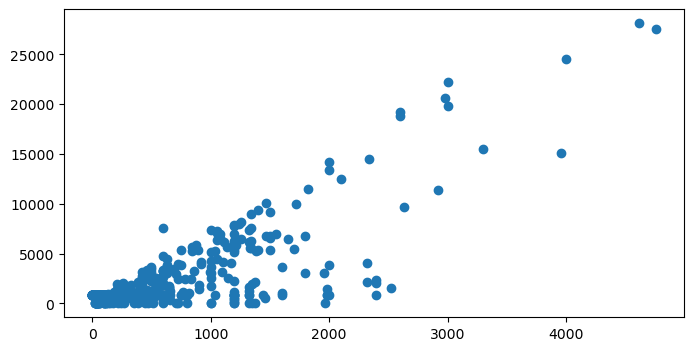

In [42]:
plt.figure(figsize=(8,4))
plt.scatter(df['capacity_mw'],df['generation_gwh_2014'])

we can notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2014

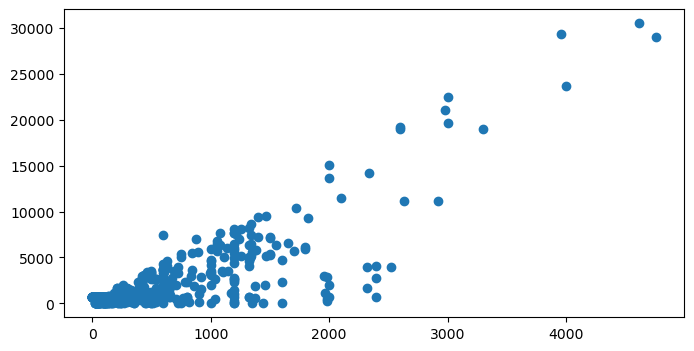

In [43]:
plt.figure(figsize=(8,4))
plt.scatter(df['capacity_mw'],df['generation_gwh_2015'])

In 2015 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2015

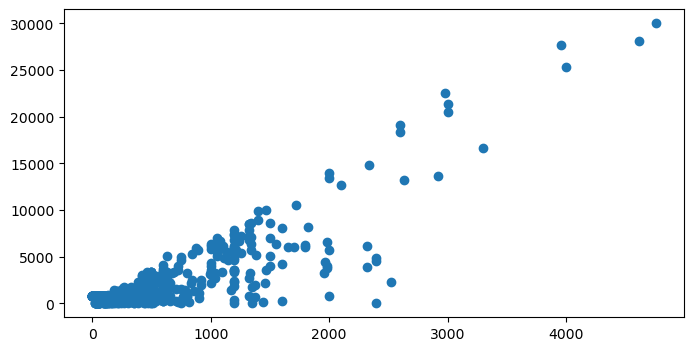

In [44]:
plt.figure(figsize=(8,4))
plt.scatter(df['capacity_mw'],df['generation_gwh_2016'])

In 2016 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2016

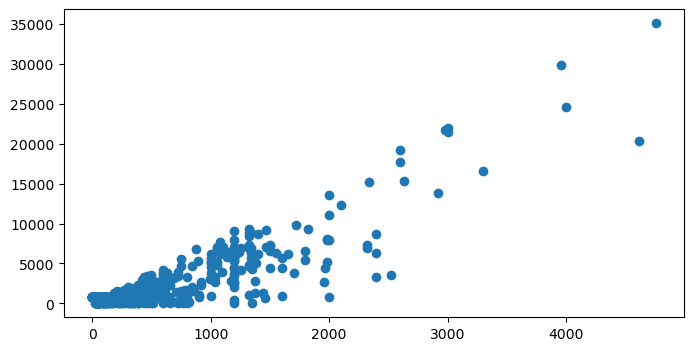

In [87]:
plt.figure(figsize=(8,4))
plt.scatter(df['capacity_mw'],df['generation_gwh_2017'])

In 2017 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2017

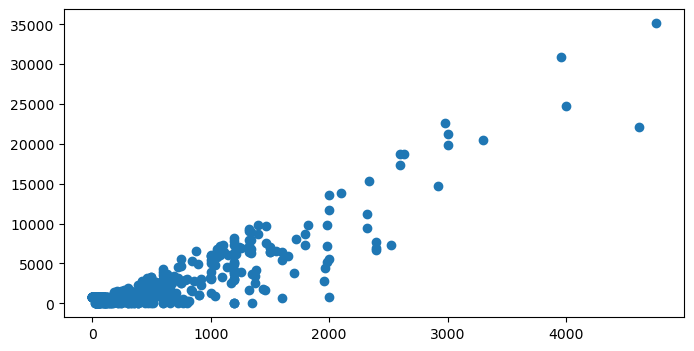

In [88]:
plt.figure(figsize=(8,4))
plt.scatter(df['capacity_mw'],df['generation_gwh_2018'])

In 2018 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2018

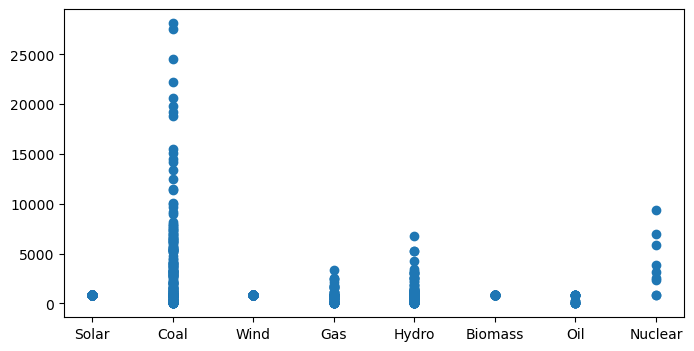

In [89]:
plt.figure(figsize=(8,4))
plt.scatter(df['primary_fuel'],df['generation_gwh_2014'])

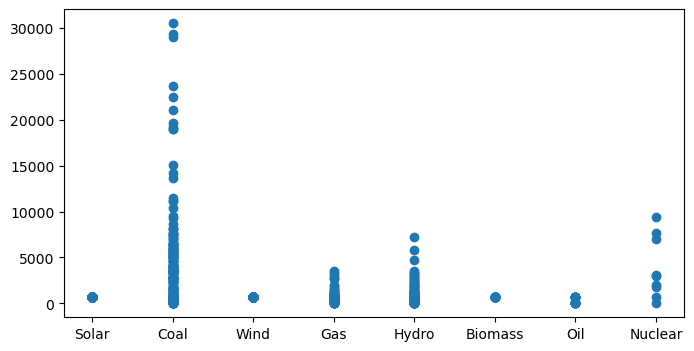

In [90]:
plt.figure(figsize=(8,4))
plt.scatter(df['primary_fuel'],df['generation_gwh_2015'])

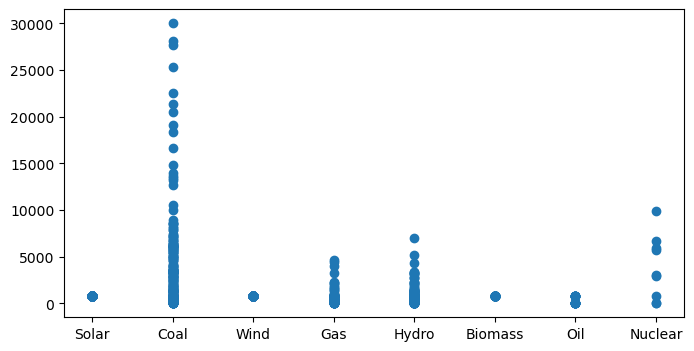

In [91]:
plt.figure(figsize=(8,4))
plt.scatter(df['primary_fuel'],df['generation_gwh_2016'])

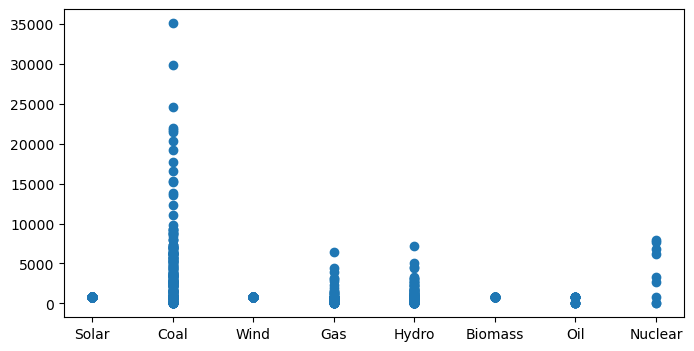

In [92]:
plt.figure(figsize=(8,4))
plt.scatter(df['primary_fuel'],df['generation_gwh_2017'])

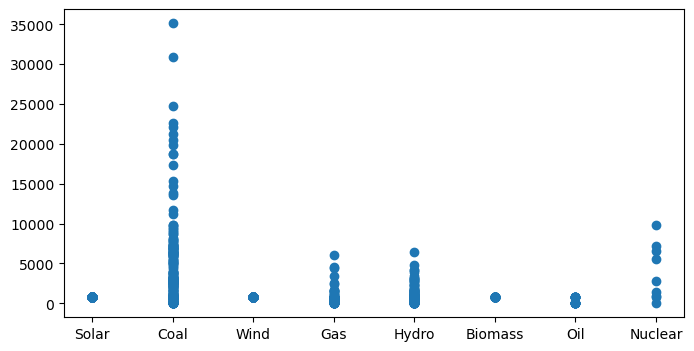

In [93]:
plt.figure(figsize=(8,4))
plt.scatter(df['primary_fuel'],df['generation_gwh_2018'])

In all of the year 2014 to 2018 the coal is most used fuel and Nuclear,Gas and hydro on average use and Solar,Wind Biomass and oil was very less used.

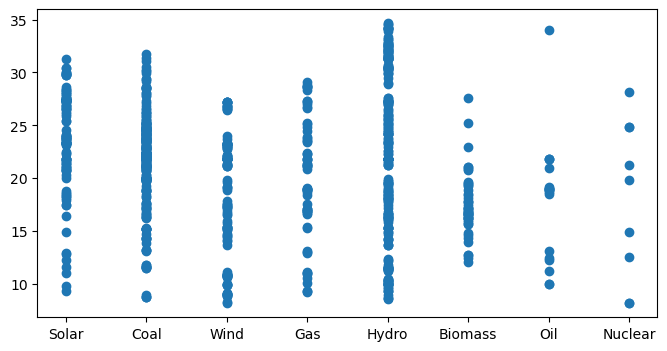

In [94]:
plt.figure(figsize=(8,4))
plt.scatter(df['primary_fuel'],df['latitude'])

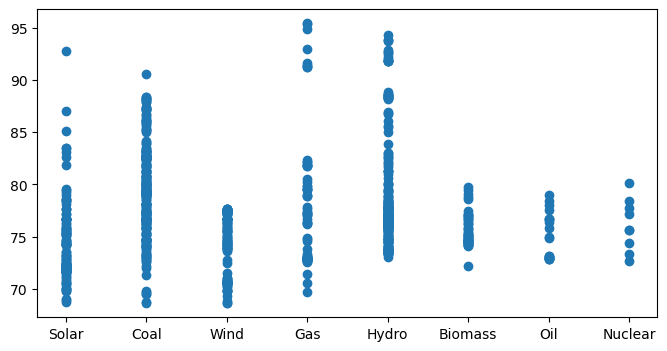

In [95]:
plt.figure(figsize=(8,4))
plt.scatter(df['primary_fuel'],df['longitude'])

In these both latitude and longitude Hydro fuel is most used.

# Multivariate Analysis :

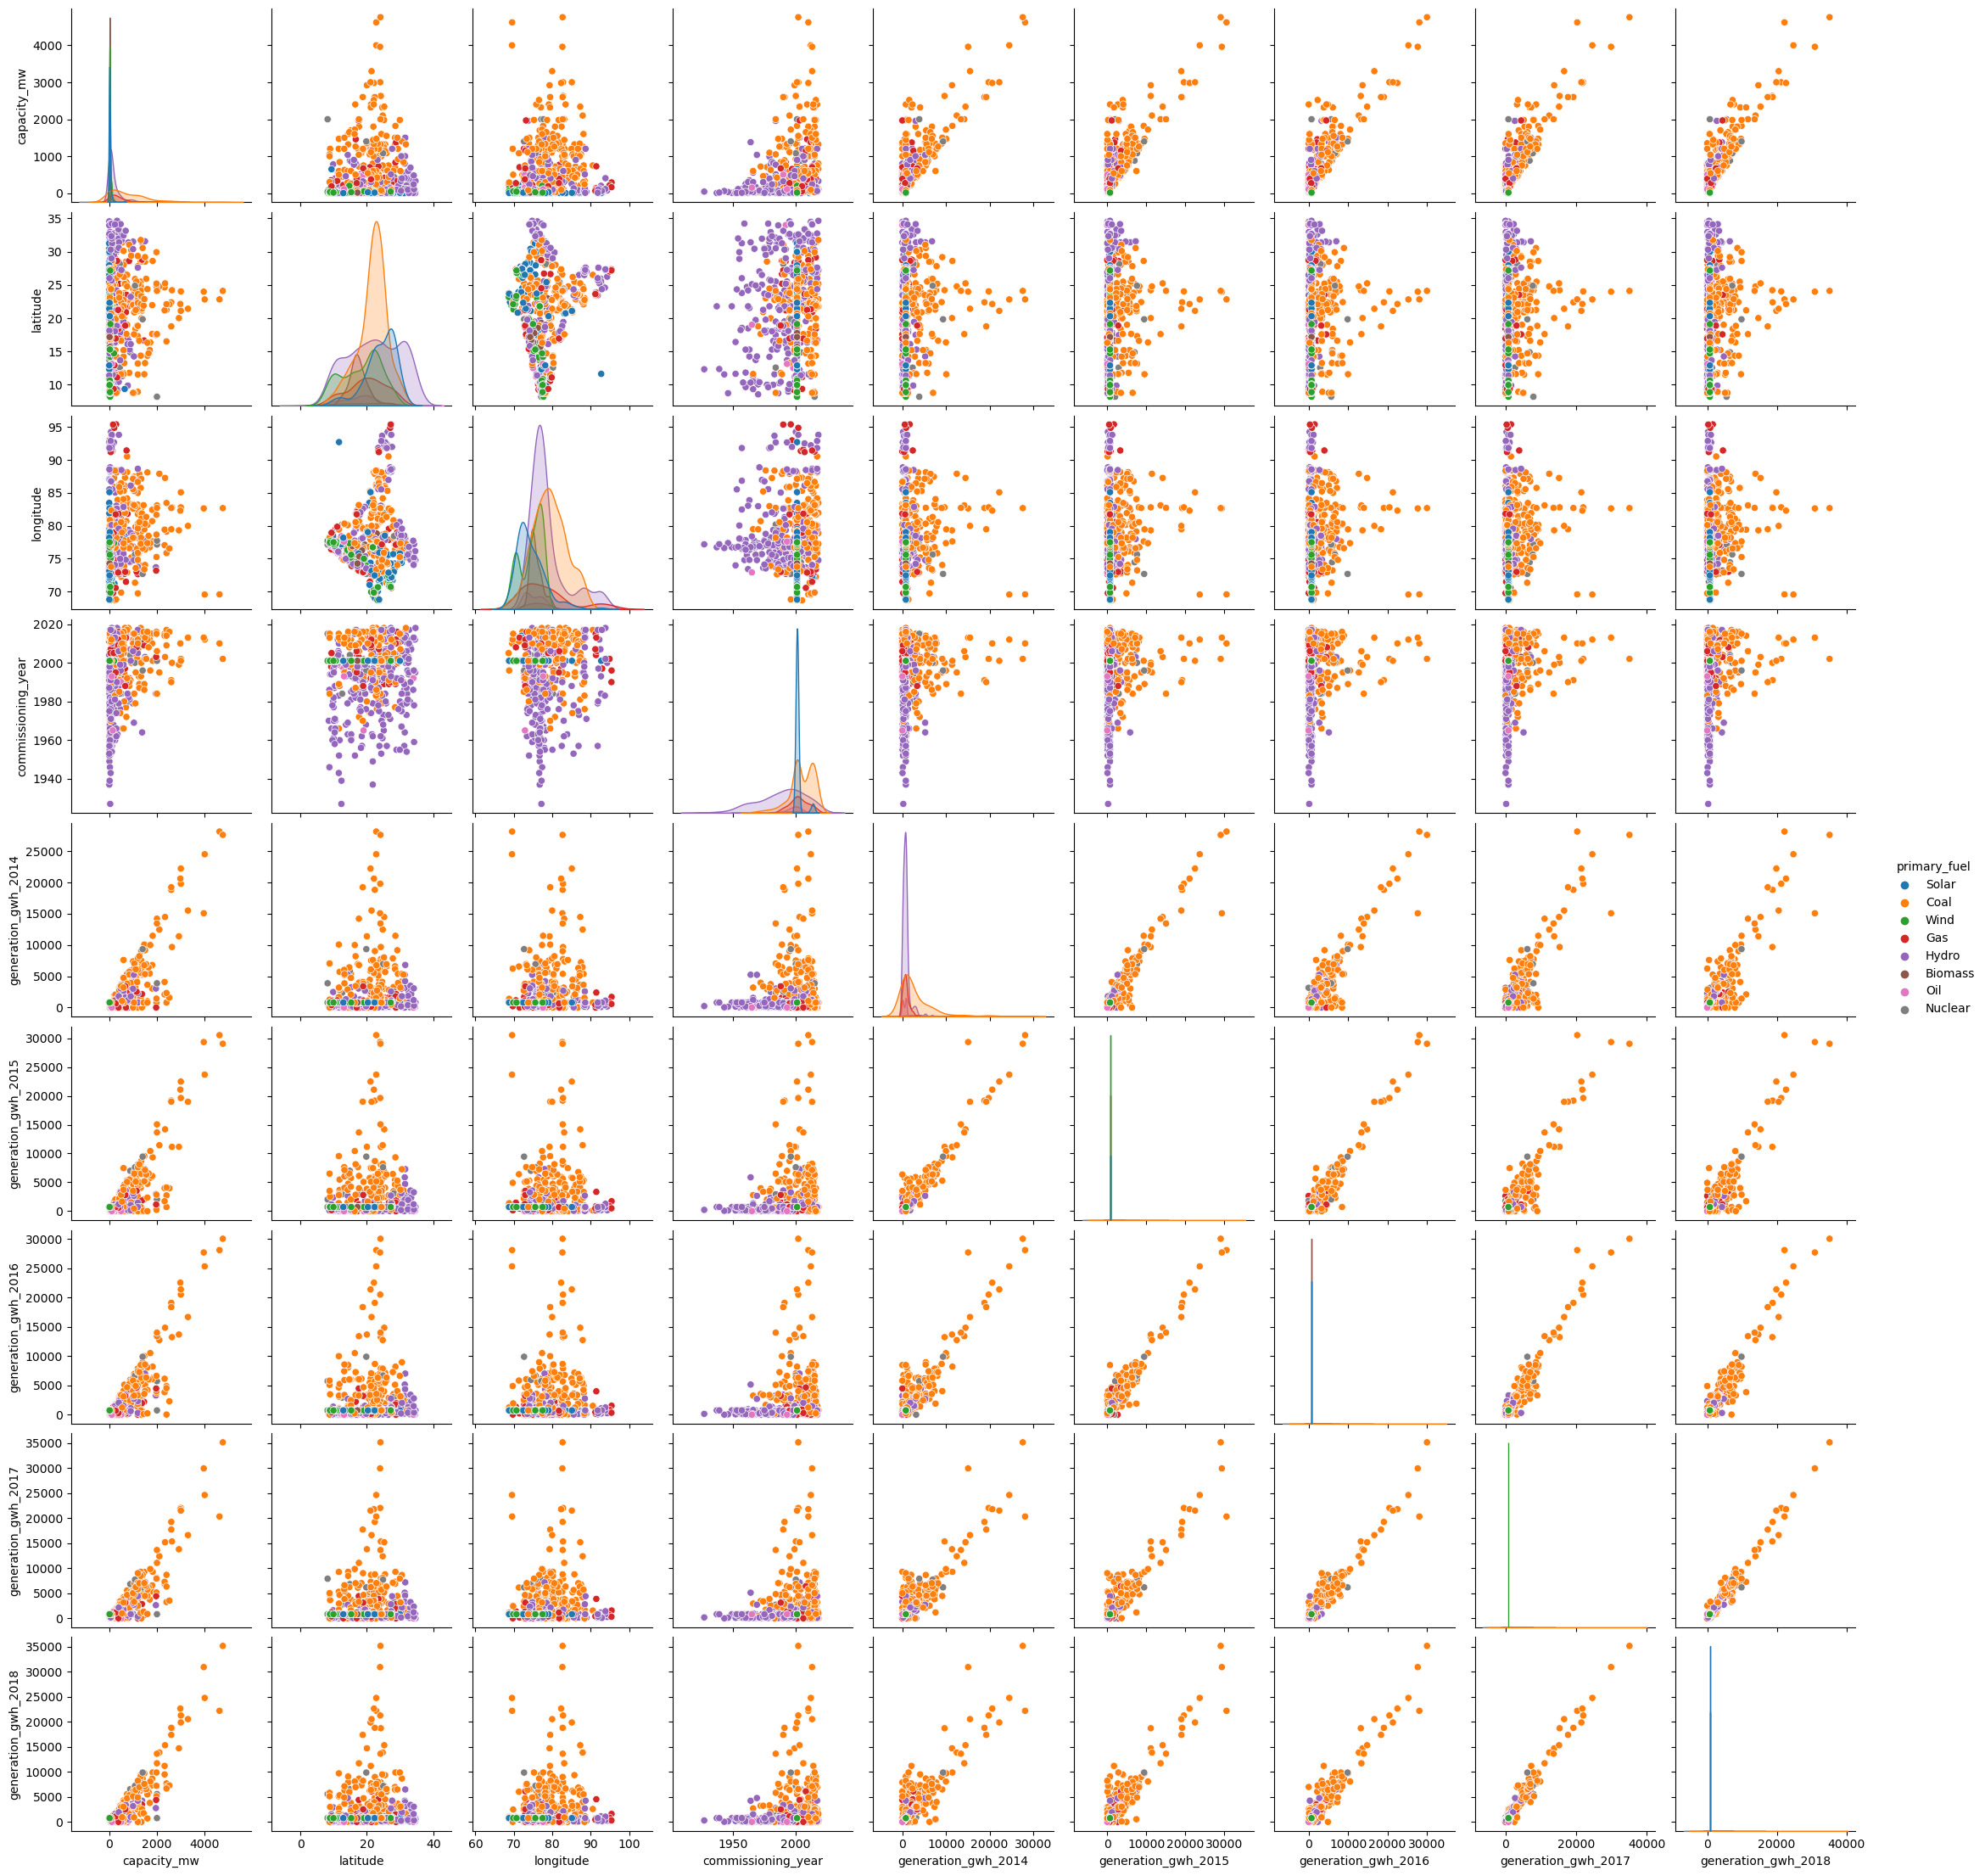

In [96]:
#pair ploting for df

sns.pairplot(df,hue="primary_fuel")

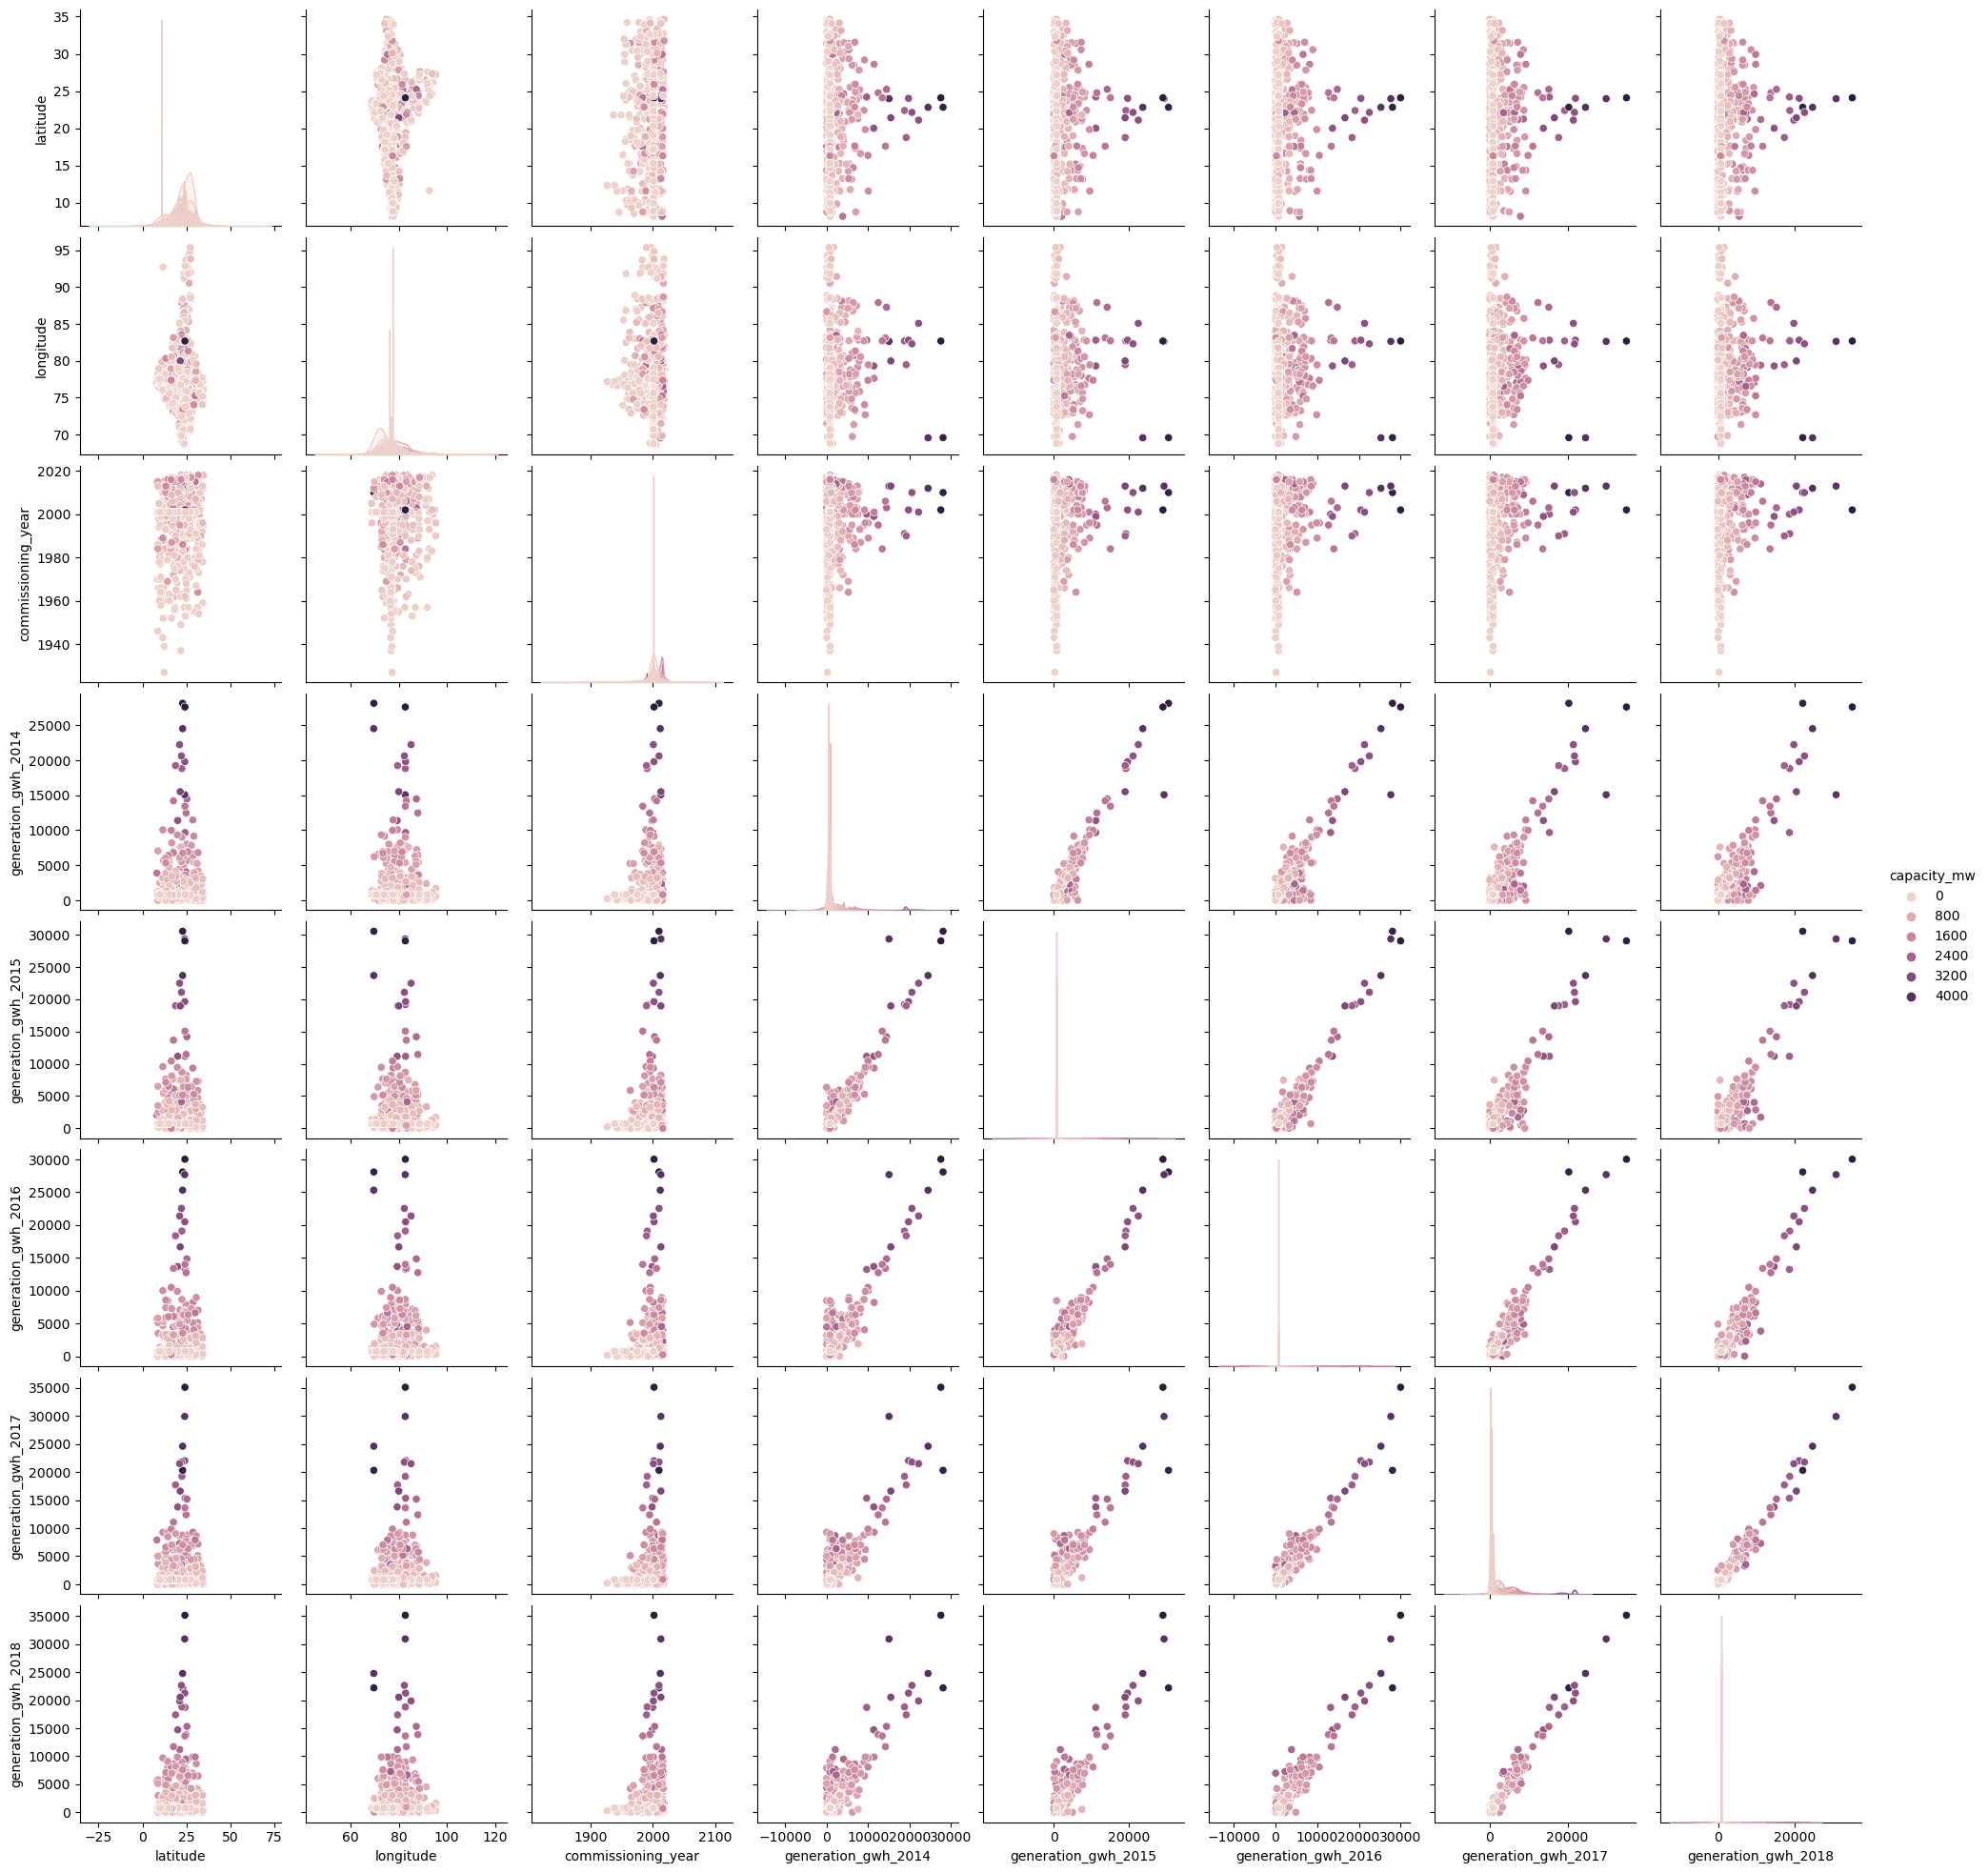

In [97]:
#pair ploting for df

sns.pairplot(df,hue="capacity_mw")

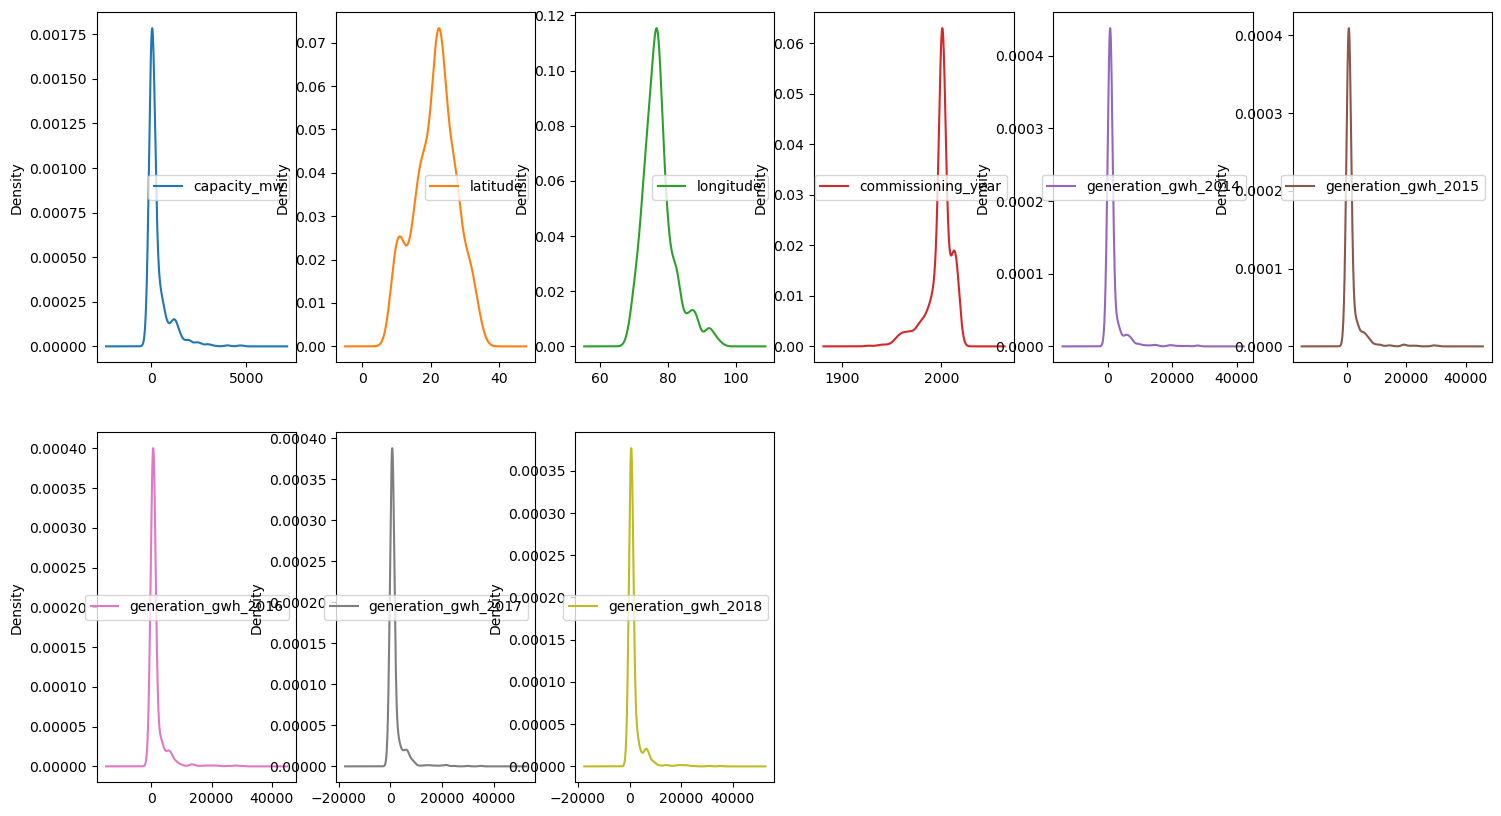

In [98]:
df.plot(kind='density',subplots=True,layout=(2,6),sharex=False,legend=True,figsize=(18,10))
plt.show()

Some of the features have strong linear relationship and most of features are highly correlated with each other. Some of the features have outliers and skewness, will remove them later.

# Outliers Detection and Removal:

<Axes: >

<Figure size 2000x800 with 0 Axes>

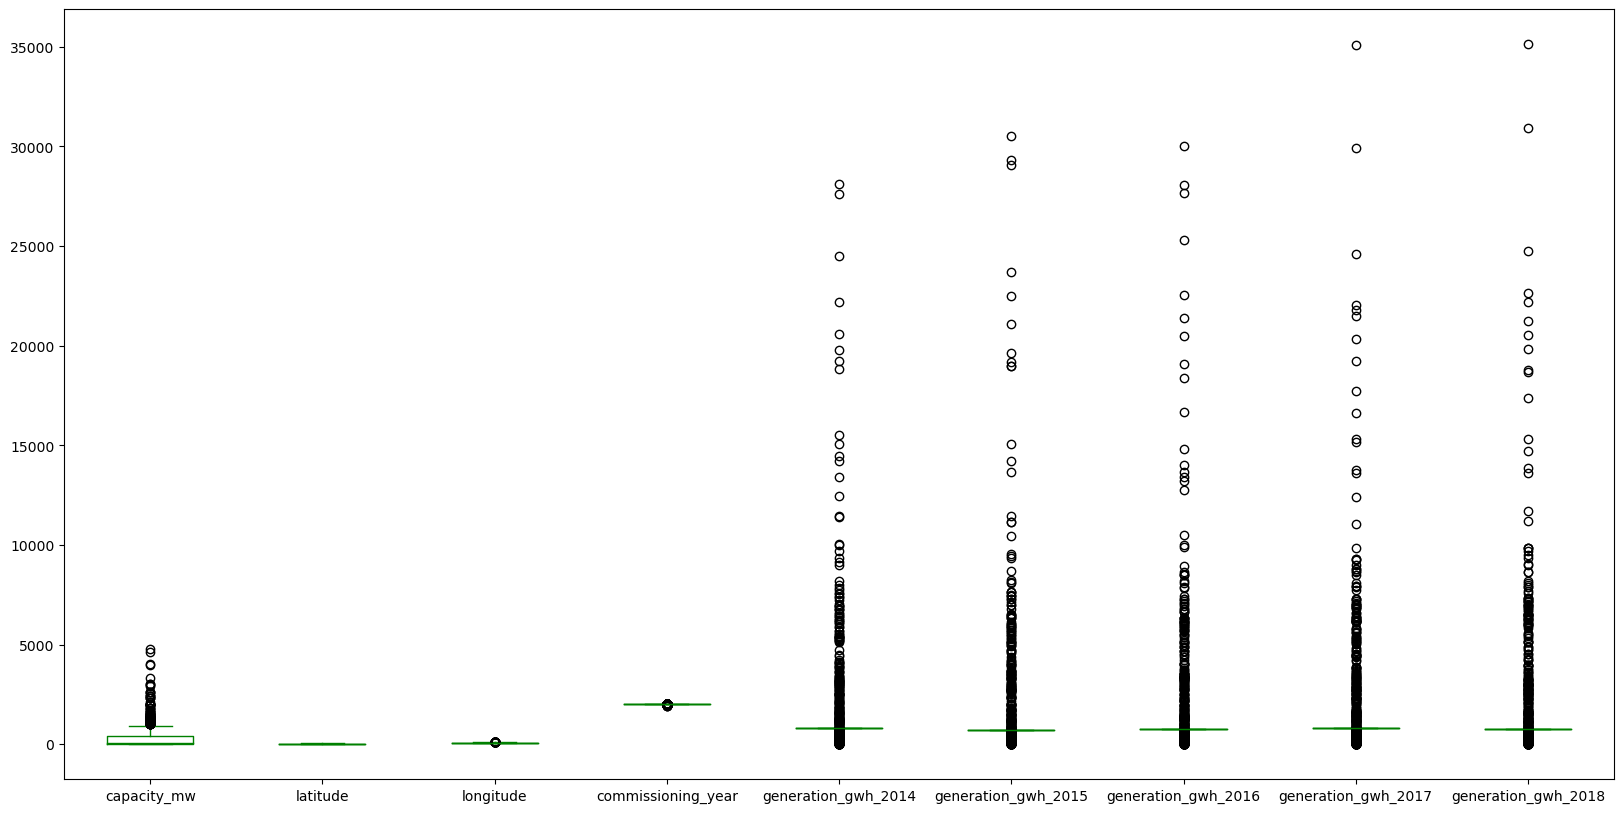

In [30]:
plt.figure(figsize=(20,8))
df.plot(kind='box',fontsize=10,figsize=(20,10),color='g')

Except latitude, there is outliers present in every column

Removing Outliers :

In [31]:
# Zscore method:

#Features having outliers
features = df[['capacity_mw', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018']]

In [32]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0            2.5   28.1839    73.2407        Solar              2011.0   
1           98.0   24.7663    74.6090         Coal              2001.0   
2           39.2   21.9038    69.3732         Wind              2001.0   
3          135.0   23.8712    91.3602          Gas              2004.0   
4         1800.0   21.9603    82.4091         Coal              2015.0   
..           ...       ...        ...          ...                 ...   
902       1600.0   16.2949    77.3568         Coal              2016.0   
903          3.0   12.8932    78.1654        Solar              2001.0   
904         25.5   15.2758    75.5811         Wind              2001.0   
905         80.0   24.3500    73.7477         Coal              2001.0   
906         16.5    9.9344    77.4768         Wind              2001.0   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory           801.123775   
1                                     WRI           801.123775   
2                                     WRI           801.123775   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI           801.123775   
903                        Industry About           801.123775   
904                                   WRI           801.123775   
905                                   WRI           801.123775   
906                                   WRI           801.123775   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0             711.181225           737.205450           817.977250   
1             711.181225           737.205450           817.977250   
2             711.181225           737.205450           817.977250   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903           711.181225           737.205450           817.977250   
904           711.181225           737.205450           817.977250   
905           711.181225           737.205450           817.977250   
906           711.181225           737.205450           817.977250   

     generation_gwh_2018  
0             751.644375  
1             751.644375  
2             751.644375  
3             626.239128  
4            7279.000000  
..                   ...  
902           686.500000  
903           751.644375  
904           751.644375  
905           751.644375  
906           751.644375  

[846 rows x 12 columns]

In [33]:
# Shape of original dataset

df.shape

(907, 12)

In [34]:
# Shape of new dataframe

df_new.shape

(846, 12)

In [35]:
# Checking the the data loss
data_loss = (907-846)/907*100
data_loss

6.725468577728775

I can see dataloss in zscore method after removing outliers of 6.7% which is less than 10%. So we check Skewness now.

# Encoding Categorical columns

In [36]:
# As our data has lot of string/object values so convert in numerical data

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_new.columns:
    if df_new[i].dtypes=="object":
        df_new[i]=le.fit_transform(df_new[i].values.reshape(-1,1))
df_new

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0            2.5   28.1839    73.2407             6              2011.0   
1           98.0   24.7663    74.6090             1              2001.0   
2           39.2   21.9038    69.3732             7              2001.0   
3          135.0   23.8712    91.3602             2              2004.0   
4         1800.0   21.9603    82.4091             1              2015.0   
..           ...       ...        ...           ...                 ...   
902       1600.0   16.2949    77.3568             1              2016.0   
903          3.0   12.8932    78.1654             6              2001.0   
904         25.5   15.2758    75.5811             7              2001.0   
905         80.0   24.3500    73.7477             1              2001.0   
906         16.5    9.9344    77.4768             7              2001.0   

     source  geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0       109                   1           801.123775           711.181225   
1       174                   2           801.123775           711.181225   
2        21                   2           801.123775           711.181225   
3        22                   2           617.789264           843.747000   
4        22                   2          3035.550000          5916.370000   
..      ...                 ...                  ...                  ...   
902      22                   2           801.123775             0.994875   
903      77                   0           801.123775           711.181225   
904      21                   2           801.123775           711.181225   
905      59                   2           801.123775           711.181225   
906      21                   2           801.123775           711.181225   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0             737.205450           817.977250           751.644375  
1             737.205450           817.977250           751.644375  
2             737.205450           817.977250           751.644375  
3             886.004428           663.774500           626.239128  
4            6243.000000          5385.579736          7279.000000  
..                   ...                  ...                  ...  
902           233.596650           865.400000           686.500000  
903           737.205450           817.977250           751.644375  
904           737.205450           817.977250           751.644375  
905           737.205450           817.977250           751.644375  
906           737.205450           817.977250           751.644375  

[846 rows x 12 columns]

# Correlation :

In [38]:
#Now we check correlation of input parameters with output "quality" :
#positively correlated : direct correlation
#negatively correlated : negative correlation

In [39]:
dfcor=df_new.corr()
dfcor

capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw             1.000000  0.051017   0.267535     -0.399258   
latitude                0.051017  1.000000  -0.015033      0.000280   
longitude               0.267535 -0.015033   1.000000     -0.382790   
primary_fuel           -0.399258  0.000280  -0.382790      1.000000   
commissioning_year      0.221471  0.098391   0.078514     -0.067425   
source                 -0.281067  0.067892  -0.235295      0.035757   
geolocation_source      0.239771 -0.201544   0.263498     -0.477833   
generation_gwh_2014     0.649177  0.078468   0.118292     -0.247812   
generation_gwh_2015     0.698624  0.067803   0.151985     -0.271721   
generation_gwh_2016     0.771628  0.052989   0.192754     -0.282330   
generation_gwh_2017     0.788933  0.069164   0.194455     -0.281962   
generation_gwh_2018     0.800151  0.063740   0.206843     -0.289959   

                     commissioning_year    source  geolocation_source  \
capacity_mw                    0.221471 -0.281067            0.239771   
latitude                       0.098391  0.067892           -0.201544   
longitude                      0.078514 -0.235295            0.263498   
primary_fuel                  -0.067425  0.035757           -0.477833   
commissioning_year             1.000000  0.079711           -0.055035   
source                         0.079711  1.000000           -0.497294   
geolocation_source            -0.055035 -0.497294            1.000000   
generation_gwh_2014            0.055515 -0.140080            0.112280   
generation_gwh_2015            0.122384 -0.153732            0.123223   
generation_gwh_2016            0.192343 -0.156141            0.125154   
generation_gwh_2017            0.209235 -0.152218            0.122010   
generation_gwh_2018            0.202943 -0.160957            0.129014   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                     0.649177             0.698624   
latitude                        0.078468             0.067803   
longitude                       0.118292             0.151985   
primary_fuel                   -0.247812            -0.271721   
commissioning_year              0.055515             0.122384   
source                         -0.140080            -0.153732   
geolocation_source              0.112280             0.123223   
generation_gwh_2014             1.000000             0.913705   
generation_gwh_2015             0.913705             1.000000   
generation_gwh_2016             0.802119             0.909054   
generation_gwh_2017             0.754073             0.835419   
generation_gwh_2018             0.753995             0.832551   

                     generation_gwh_2016  generation_gwh_2017  \
capacity_mw                     0.771628             0.788933   
latitude                        0.052989             0.069164   
longitude                       0.192754             0.194455   
primary_fuel                   -0.282330            -0.281962   
commissioning_year              0.192343             0.209235   
source                         -0.156141            -0.152218   
geolocation_source              0.125154             0.122010   
generation_gwh_2014             0.802119             0.754073   
generation_gwh_2015             0.909054             0.835419   
generation_gwh_2016             1.000000             0.936047   
generation_gwh_2017             0.936047             1.000000   
generation_gwh_2018             0.926948             0.968753   

                     generation_gwh_2018  
capacity_mw                     0.800151  
latitude                        0.063740  
longitude                       0.206843  
primary_fuel                   -0.289959  
commissioning_year              0.202943  
source                         -0.160957  
geolocation_source              0.129014  
generation_gwh_2014             0.753995  
generation_gwh_2015             0.832551  
generation_gwh_2016      

<Axes: >

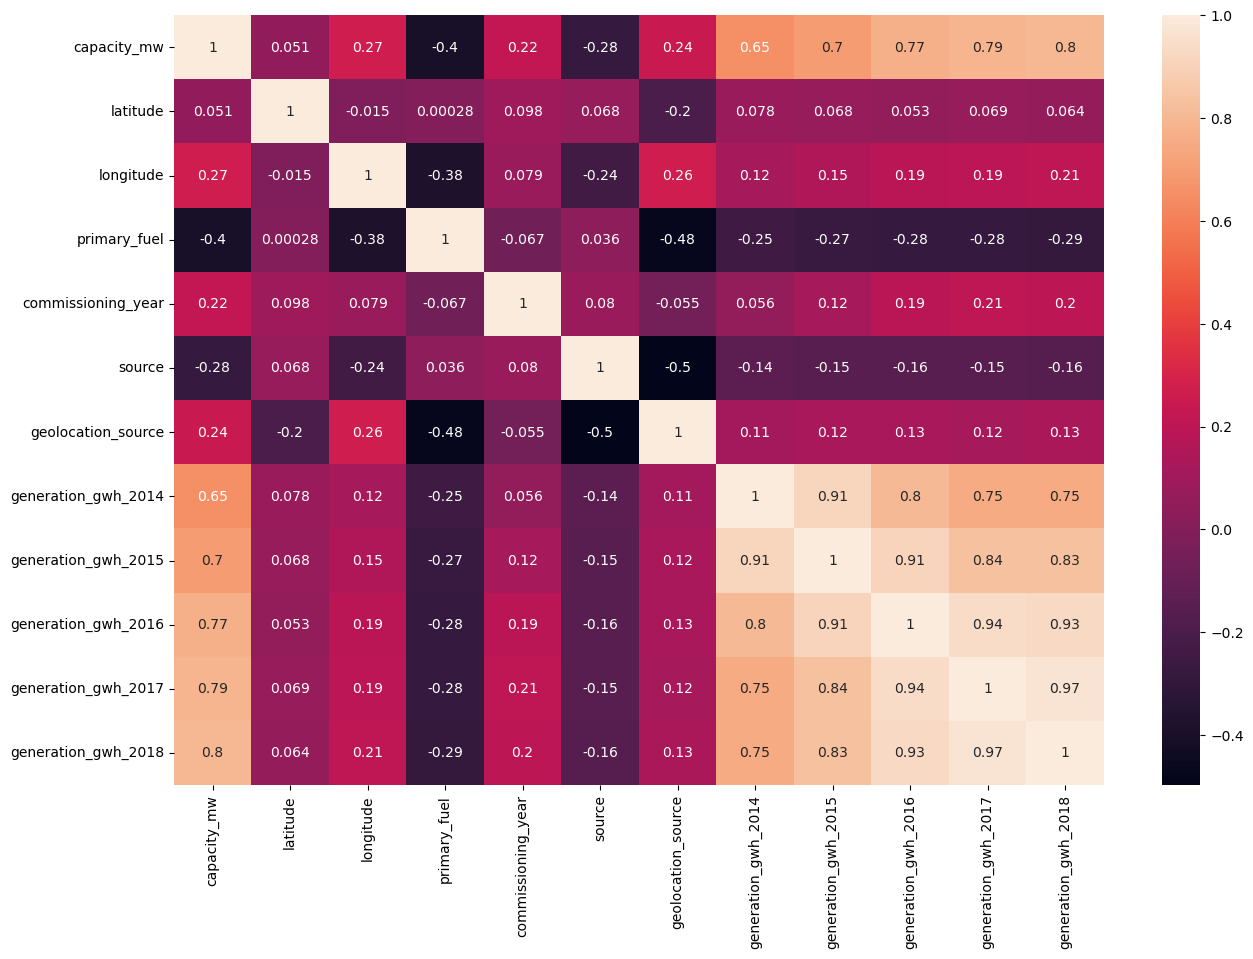

In [40]:
# For better understanding of correlation matrix between columns we draw heatmap :

plt.figure(figsize=(15,10))
sns.heatmap(dfcor,annot=True)

<Axes: >

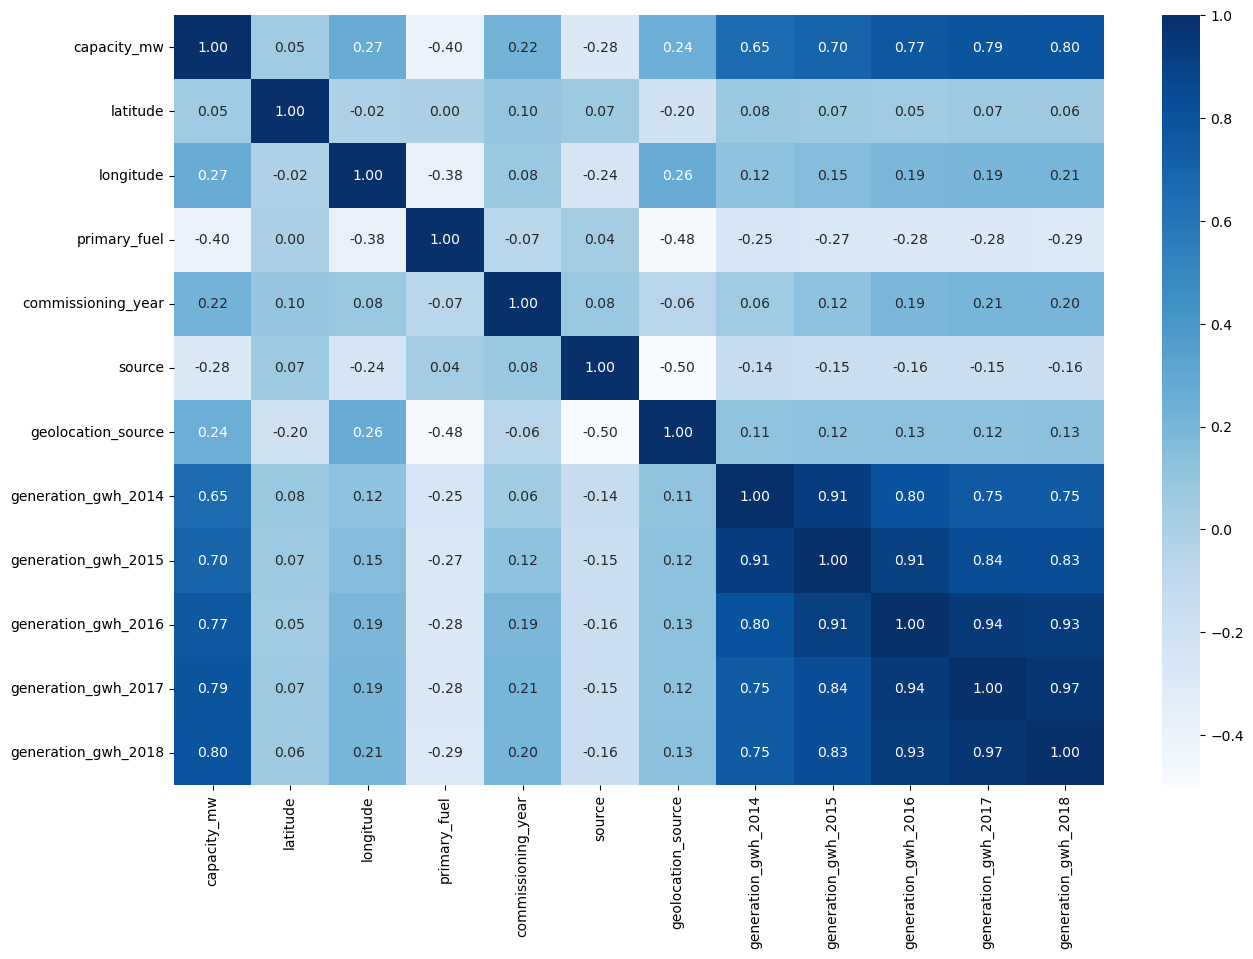

In [41]:
# We can change color also and decimal values place :

plt.figure(figsize=(15,10))
sns.heatmap(dfcor,annot=True,cmap='Blues',fmt='0.2f',cbar=True,square=False)

In [42]:
#Correlation of all columns with the target column 'Attrition':

df_new.corr()["primary_fuel"].sort_values()

geolocation_source    -0.477833
capacity_mw           -0.399258
longitude             -0.382790
generation_gwh_2018   -0.289959
generation_gwh_2016   -0.282330
generation_gwh_2017   -0.281962
generation_gwh_2015   -0.271721
generation_gwh_2014   -0.247812
commissioning_year    -0.067425
latitude               0.000280
source                 0.035757
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

In [43]:
#Correlation of all columns with the target column 'Attrition':

df_new.corr()["capacity_mw"].sort_values()

primary_fuel          -0.399258
source                -0.281067
latitude               0.051017
commissioning_year     0.221471
geolocation_source     0.239771
longitude              0.267535
generation_gwh_2014    0.649177
generation_gwh_2015    0.698624
generation_gwh_2016    0.771628
generation_gwh_2017    0.788933
generation_gwh_2018    0.800151
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

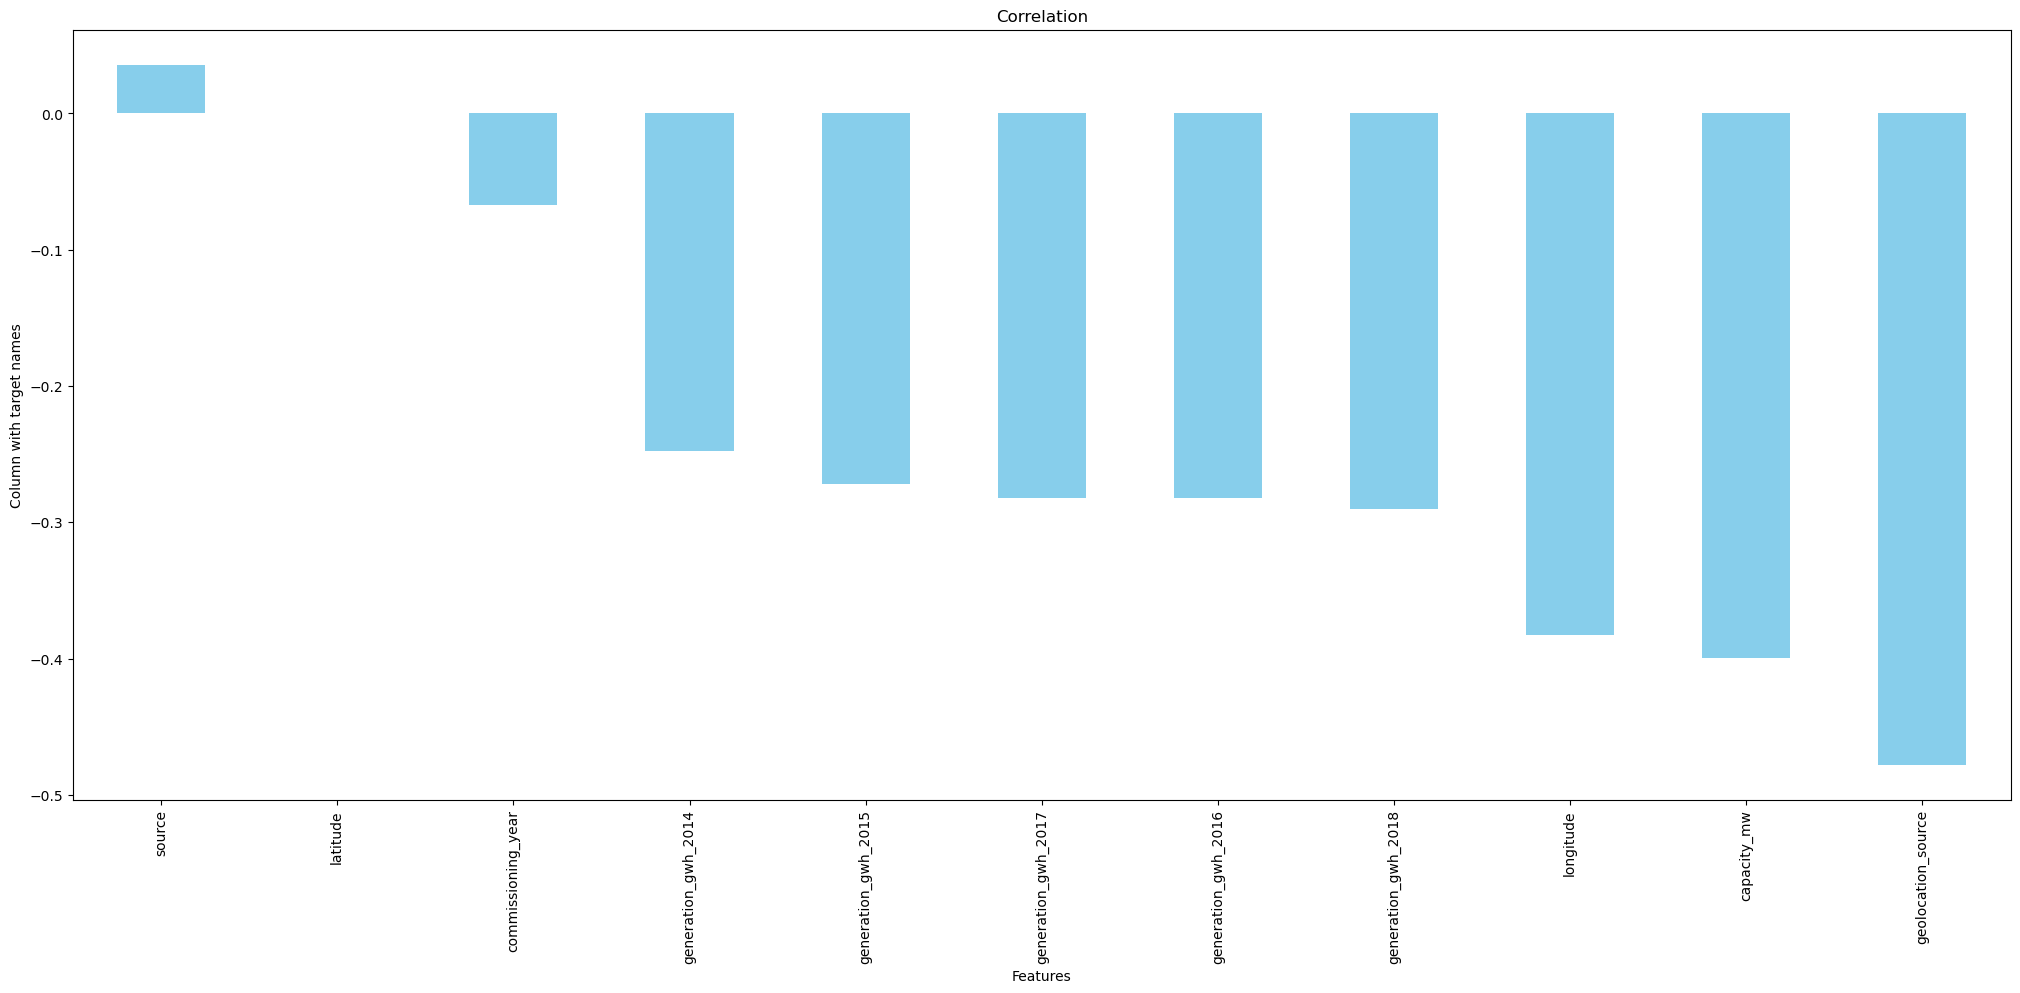

In [44]:
plt.figure(figsize =(25, 10))
df_new.corr()['primary_fuel'].sort_values(ascending = False).drop(['primary_fuel']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

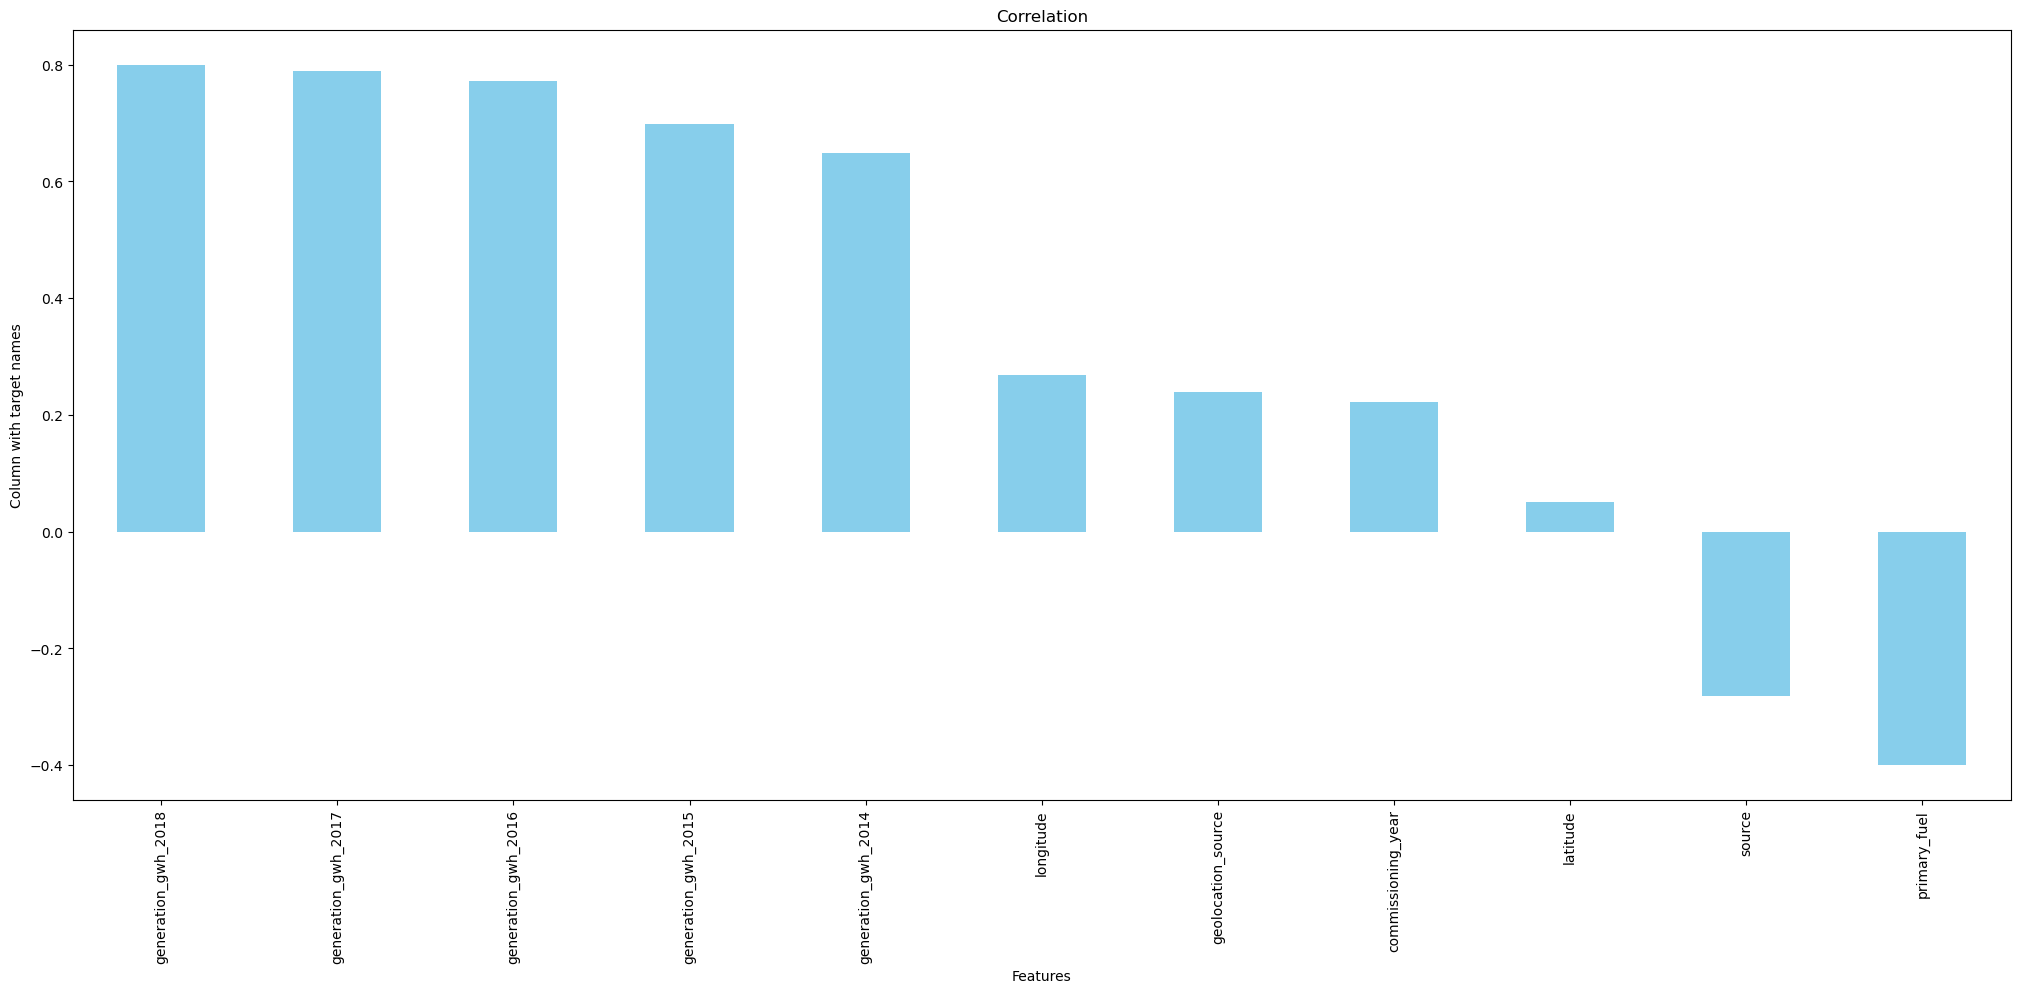

In [45]:
plt.figure(figsize =(25, 10))
df_new.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

# Data Preprocessing :

# 1) Target Column "primary_fuel"

In [61]:
x=df_new.drop("primary_fuel", axis=1)
y=df_new["primary_fuel"]

In [62]:
x

capacity_mw  latitude  longitude  commissioning_year  source  \
0            2.5   28.1839    73.2407              2011.0     109   
1           98.0   24.7663    74.6090              2001.0     174   
2           39.2   21.9038    69.3732              2001.0      21   
3          135.0   23.8712    91.3602              2004.0      22   
4         1800.0   21.9603    82.4091              2015.0      22   
..           ...       ...        ...                 ...     ...   
902       1600.0   16.2949    77.3568              2016.0      22   
903          3.0   12.8932    78.1654              2001.0      77   
904         25.5   15.2758    75.5811              2001.0      21   
905         80.0   24.3500    73.7477              2001.0      59   
906         16.5    9.9344    77.4768              2001.0      21   

     geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0                     1           801.123775           711.181225   
1                     2           801.123775           711.181225   
2                     2           801.123775           711.181225   
3                     2           617.789264           843.747000   
4                     2          3035.550000          5916.370000   
..                  ...                  ...                  ...   
902                   2           801.123775             0.994875   
903                   0           801.123775           711.181225   
904                   2           801.123775           711.181225   
905                   2           801.123775           711.181225   
906                   2           801.123775           711.181225   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0             737.205450           817.977250           751.644375  
1             737.205450           817.977250           751.644375  
2             737.205450           817.977250           751.644375  
3             886.004428           663.774500           626.239128  
4            6243.000000          5385.579736          7279.000000  
..                   ...                  ...                  ...  
902           233.596650           865.400000           686.500000  
903           737.205450           817.977250           751.644375  
904           737.205450           817.977250           751.644375  
905           737.205450           817.977250           751.644375  
906           737.205450           817.977250           751.644375  

[846 rows x 11 columns]

In [63]:
y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 846, dtype: int32

# Handling Imbalance Data :

In [64]:
# Oversampling

from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)
y.value_counts() 

6    233
1    233
7    233
2    233
3    233
0    233
5    233
4    233
Name: primary_fuel, dtype: int64

# Check skewness

In [65]:
x.skew().sort_values(ascending=False)

generation_gwh_2015    2.895809
generation_gwh_2014    2.830137
generation_gwh_2018    2.654703
generation_gwh_2016    2.567707
generation_gwh_2017    2.421327
capacity_mw            2.059991
source                 1.373835
longitude              1.238776
latitude               0.039802
commissioning_year    -1.437799
geolocation_source    -2.322543
dtype: float64

*Observation : High skewness present in some parameters so we apply Transformation.

In [66]:
#Remove Skewness - apply power transformation

from sklearn.preprocessing import power_transform
x_new=power_transform(x,method='yeo-johnson')
x_new

array([[-1.81813405e+00,  1.42485267e+00, -8.99591957e-01, ...,
        -6.30114759e-03, -2.50646544e-02,  5.34694746e-03],
       [ 2.12059727e-01,  8.49167611e-01, -3.94974075e-01, ...,
        -6.30114759e-03, -2.50646544e-02,  5.34694746e-03],
       [-3.03641601e-01,  3.59380043e-01, -2.70790700e+00, ...,
        -6.30114759e-03, -2.50646544e-02,  5.34694746e-03],
       ...,
       [-7.99773734e-01, -7.70525899e-01,  4.56556527e-04, ...,
        -6.30114759e-03, -2.50646544e-02,  5.34694746e-03],
       [-5.89877940e-01, -1.64571083e+00,  4.47759034e-01, ...,
        -6.30114759e-03, -2.50646544e-02,  5.34694746e-03],
       [-1.73817455e-01, -8.55260082e-01,  8.83085682e-02, ...,
        -6.30114759e-03, -2.50646544e-02,  5.34694746e-03]])

In [67]:
x=pd.DataFrame(x_new,columns=x.columns)                                        #convert transformed data into DataFrame

In [68]:
x.skew().sort_values(ascending=False)

generation_gwh_2014    0.164649
generation_gwh_2015    0.117868
generation_gwh_2017    0.056828
generation_gwh_2016    0.040372
capacity_mw            0.025973
generation_gwh_2018    0.018403
longitude             -0.041969
latitude              -0.044925
source                -0.090690
commissioning_year    -0.331898
geolocation_source    -2.299927
dtype: float64

In [69]:
from sklearn.preprocessing import PowerTransformer 
trans=PowerTransformer(method='yeo-johnson')

In [70]:
x[["geolocation_source"]]=trans.fit_transform(x[["geolocation_source"]].values)
x.skew().sort_values(ascending=False)

generation_gwh_2014    0.164649
generation_gwh_2015    0.117868
generation_gwh_2017    0.056828
generation_gwh_2016    0.040372
capacity_mw            0.025973
generation_gwh_2018    0.018403
longitude             -0.041969
latitude              -0.044925
source                -0.090690
commissioning_year    -0.331898
geolocation_source    -2.299632
dtype: float64

In [71]:
np.log(x['geolocation_source'])

0            NaN
1      -0.982838
2      -0.982838
3      -0.982838
4      -0.982838
          ...   
1859   -0.982838
1860   -0.982838
1861   -0.982838
1862   -0.982838
1863   -0.982838
Name: geolocation_source, Length: 1864, dtype: float64

In [72]:
x.skew().sort_values(ascending=False)

generation_gwh_2014    0.164649
generation_gwh_2015    0.117868
generation_gwh_2017    0.056828
generation_gwh_2016    0.040372
capacity_mw            0.025973
generation_gwh_2018    0.018403
longitude             -0.041969
latitude              -0.044925
source                -0.090690
commissioning_year    -0.331898
geolocation_source    -2.299632
dtype: float64

I tried all thing and skewness present here are shown here.

# Feature Scaling :

In [73]:
# Scaling increases the model performance to much extent, we get best result after scaling data

# Standard Scaling :

from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x1=st.fit_transform(x)
x1

array([[-1.81813405e+00,  1.42485267e+00, -8.99610101e-01, ...,
        -6.30114759e-03, -2.50646544e-02,  5.34694746e-03],
       [ 2.12059727e-01,  8.49167611e-01, -3.94992219e-01, ...,
        -6.30114759e-03, -2.50646544e-02,  5.34694746e-03],
       [-3.03641601e-01,  3.59380043e-01, -2.70792514e+00, ...,
        -6.30114759e-03, -2.50646544e-02,  5.34694746e-03],
       ...,
       [-7.99773734e-01, -7.70525899e-01,  4.38412588e-04, ...,
        -6.30114759e-03, -2.50646544e-02,  5.34694746e-03],
       [-5.89877940e-01, -1.64571083e+00,  4.47740890e-01, ...,
        -6.30114759e-03, -2.50646544e-02,  5.34694746e-03],
       [-1.73817455e-01, -8.55260082e-01,  8.82904243e-02, ...,
        -6.30114759e-03, -2.50646544e-02,  5.34694746e-03]])

In [74]:
x=pd.DataFrame(x1,columns=x.columns)                                   #convert scaled data into DataFrame

In [75]:
# Multicollinearity Check VIF Technique

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
    
vif_calc()

    VIF Factor             features
0     1.805454          capacity_mw
1     1.155643             latitude
2     1.202070            longitude
3     1.112393   commissioning_year
4     1.221745               source
5     1.497552   geolocation_source
6     5.811040  generation_gwh_2014
7    10.001140  generation_gwh_2015
8    15.412655  generation_gwh_2016
9     8.079397  generation_gwh_2017
10   11.031933  generation_gwh_2018


Highest vif present in generation_gwh_2016 so we drop this column

In [77]:
x=x.drop(["generation_gwh_2016"],axis=1)

In [78]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
    
vif_calc()

   VIF Factor             features
0    1.800625          capacity_mw
1    1.155616             latitude
2    1.191066            longitude
3    1.084930   commissioning_year
4    1.221399               source
5    1.497531   geolocation_source
6    5.811038  generation_gwh_2014
7    7.507602  generation_gwh_2015
8    6.678747  generation_gwh_2017
9    9.563018  generation_gwh_2018


** As all vif value <=10 so we can proceed .

# Train and Test Splitting :

In [79]:
## Metrics Imported :
    
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [80]:
from sklearn.tree import DecisionTreeClassifier

maxAccu=0                            #maximum accuracy
maxRS=0                             #best random state for which max accuracy is achieved

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)                                #fitting the data will train your model
    predrf=dt.predict(x_test)                              #Predicted Target Variable
    acc=accuracy_score(y_test,predrf)
    print('testing accuracy',acc,'random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy',maxAccu,'max_random_state',i)

testing accuracy 0.8927613941018767 random_state 1
max_accuracy 0.8927613941018767 max_random_state 1
testing accuracy 0.8981233243967829 random_state 2
max_accuracy 0.8981233243967829 max_random_state 2
testing accuracy 0.8766756032171582 random_state 3
testing accuracy 0.8847184986595175 random_state 4
testing accuracy 0.8927613941018767 random_state 5
testing accuracy 0.8659517426273459 random_state 6
testing accuracy 0.8847184986595175 random_state 7
testing accuracy 0.8552278820375335 random_state 8
testing accuracy 0.8739946380697051 random_state 9
testing accuracy 0.8659517426273459 random_state 10
testing accuracy 0.8605898123324397 random_state 11
testing accuracy 0.8659517426273459 random_state 12
testing accuracy 0.8605898123324397 random_state 13
testing accuracy 0.8900804289544236 random_state 14
testing accuracy 0.8793565683646113 random_state 15
testing accuracy 0.8873994638069705 random_state 16
testing accuracy 0.8471849865951743 random_state 17
testing accuracy 0.8445

Best accuracy is .90 % at random state =45

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=45)

In [82]:
x.shape,x_train.shape,x_test.shape

((1864, 10), (1491, 10), (373, 10))

# Classification Algorithms:

Modelling :

1. LOGISTICS REGRESSION

In [83]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

LR.fit(x_train,y_train)

LogisticRegression()

Our Model is successfully trained , Lets perform prediction

In [84]:
pred_train_lr=LR.predict(x_train)
predlr=LR.predict(x_test)
print("Training Accuracy",accuracy_score(y_train,pred_train_lr)*100) 
print("Testing Accuracy:-",accuracy_score(y_test,predlr)*100)                               #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predlr))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predlr))                    # Take Classification report as CR

Training Accuracy 71.89805499664655
Testing Accuracy:- 78.55227882037534
CM:- [[44  0  0  0  0  2  0  5]
 [ 5 24  7  1  7  0  0  3]
 [ 0  4 18  5  2  9  0  1]
 [ 0  6  2 31  3  3  0  3]
 [ 0  0  0  6 43  0  0  0]
 [ 0  1  1  0  0 36  0  0]
 [ 0  0  0  0  0  0 50  1]
 [ 0  0  1  2  0  0  0 47]]
CR:-               precision    recall  f1-score   support

           0       0.90      0.86      0.88        51
           1       0.69      0.51      0.59        47
           2       0.62      0.46      0.53        39
           3       0.69      0.65      0.67        48
           4       0.78      0.88      0.83        49
           5       0.72      0.95      0.82        38
           6       1.00      0.98      0.99        51
           7       0.78      0.94      0.85        50

    accuracy                           0.79       373
   macro avg       0.77      0.78      0.77       373
weighted avg       0.78      0.79      0.78       373



In [85]:
from sklearn.model_selection import cross_val_score
cr_1=cross_val_score(LR,x,y,cv=7)
print("Cross Validation Score of Logistic Regression model:-",cr_1.mean())
diff_1=accuracy_score(y_test,predlr)-cr_1.mean()
print("diff between accuracy score and cross validation score is -",diff_1)

Cross Validation Score of Logistic Regression model:- 0.7258716614972422
diff between accuracy score and cross validation score is - 0.05965112670651107


2. Decision Tree Classifier

In [86]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [87]:
pred_train_dtc=dt.predict(x_train)
preddt=dt.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_dtc)*100) 
print("Testing Accuracy",accuracy_score(y_test,preddt)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,preddt))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,preddt))                    # Take Classification report as CR

Training Accuracy 100.0
Testing Accuracy 88.47184986595174
CM:- [[45  5  1  0  0  0  0  0]
 [ 2 31  5  4  4  1  0  0]
 [ 0  2 31  2  1  3  0  0]
 [ 0  5  2 38  3  0  0  0]
 [ 0  0  2  0 47  0  0  0]
 [ 0  0  0  0  1 37  0  0]
 [ 0  0  0  0  0  0 51  0]
 [ 0  0  0  0  0  0  0 50]]
CR:-               precision    recall  f1-score   support

           0       0.96      0.88      0.92        51
           1       0.72      0.66      0.69        47
           2       0.76      0.79      0.77        39
           3       0.86      0.79      0.83        48
           4       0.84      0.96      0.90        49
           5       0.90      0.97      0.94        38
           6       1.00      1.00      1.00        51
           7       1.00      1.00      1.00        50

    accuracy                           0.88       373
   macro avg       0.88      0.88      0.88       373
weighted avg       0.88      0.88      0.88       373



In [88]:
from sklearn.model_selection import cross_val_score
cr_2=cross_val_score(dt,x,y,cv=7)
print("Cross Validation Score of Decision Tree Classifier:-",cr_2.mean())
diff_2=accuracy_score(y_test,preddt)-cr_2.mean()
print("diff between accuracy score and cross validation score is -",diff_2)

Cross Validation Score of Decision Tree Classifier:- 0.8835994480583481
diff between accuracy score and cross validation score is - 0.0011190506011693468


3. Support Vector Classifier

In [89]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [90]:
pred_train_svc=svc.predict(x_train)
predsvc=svc.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_svc)*100) 
print("Testing Accuracy",accuracy_score(y_test,predsvc)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predsvc))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predsvc))                    # Take Classification report as CR

Training Accuracy 85.37894030851777
Testing Accuracy 88.20375335120644
CM:- [[48  1  0  0  0  1  0  1]
 [ 3 28  6  5  3  0  0  2]
 [ 0  2 26  1  1  8  0  1]
 [ 0  5  0 42  1  0  0  0]
 [ 0  0  0  0 49  0  0  0]
 [ 1  1  0  0  0 36  0  0]
 [ 0  0  0  0  0  0 51  0]
 [ 0  0  1  0  0  0  0 49]]
CR:-               precision    recall  f1-score   support

           0       0.92      0.94      0.93        51
           1       0.76      0.60      0.67        47
           2       0.79      0.67      0.72        39
           3       0.88      0.88      0.88        48
           4       0.91      1.00      0.95        49
           5       0.80      0.95      0.87        38
           6       1.00      1.00      1.00        51
           7       0.92      0.98      0.95        50

    accuracy                           0.88       373
   macro avg       0.87      0.88      0.87       373
weighted avg       0.88      0.88      0.88       373



In [91]:
from sklearn.model_selection import cross_val_score
cr_3=cross_val_score(svc,x,y,cv=7)
print("Cross Validation Score of Support Vector Classifier:-",cr_3.mean())
diff_3=accuracy_score(y_test,predsvc)-cr_3.mean()
print("diff between accuracy score and cross validation score is -",diff_3)

Cross Validation Score of Support Vector Classifier:- 0.8455166809479557
diff between accuracy score and cross validation score is - 0.03652085256410864


4. MultinomialNB

In [92]:
from sklearn.naive_bayes import MultinomialNB

mnb=MultinomialNB()
mnb.fit(abs(x_train),y_train)

MultinomialNB()

In [93]:
pred_train_mnb=mnb.predict(x_train)
predmnb=mnb.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_mnb)*100) 
print("Testing Accuracy",accuracy_score(y_test,predmnb)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predmnb))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predmnb))                    # Take Classification report as CR

Training Accuracy 15.96244131455399
Testing Accuracy 15.549597855227882
CM:- [[28  0  0  0  0  4 19  0]
 [ 6  6  2  6 15  3  7  2]
 [ 7  1  0  0  5  0 23  3]
 [ 0  0  0  2  5  5 28  8]
 [ 3  3  0  0 21  9 13  0]
 [10  0  0  0  0  1 27  0]
 [ 1  1  0  4 17 28  0  0]
 [ 0  6  0  4 18 20  2  0]]
CR:-               precision    recall  f1-score   support

           0       0.51      0.55      0.53        51
           1       0.35      0.13      0.19        47
           2       0.00      0.00      0.00        39
           3       0.12      0.04      0.06        48
           4       0.26      0.43      0.32        49
           5       0.01      0.03      0.02        38
           6       0.00      0.00      0.00        51
           7       0.00      0.00      0.00        50

    accuracy                           0.16       373
   macro avg       0.16      0.15      0.14       373
weighted avg       0.17      0.16      0.15       373



In [94]:
from sklearn.model_selection import cross_val_score
cr_4=cross_val_score(mnb,abs(x),y,cv=7)
print("Cross Validation Score of MultinomialNB:-",cr_4.mean())
diff_4=accuracy_score(y_test,predmnb)-cr_4.mean()
print("diff between accuracy score and cross validation score is -",diff_4)

Cross Validation Score of MultinomialNB:- 0.5445234273484675
diff between accuracy score and cross validation score is - -0.38902744879618867


5. KNeighbors Classifier

In [95]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit((x_train),y_train)

KNeighborsClassifier()

In [96]:
pred_train_knn=knn.predict(x_train)
predknn=knn.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_knn)*100) 
print("Testing Accuracy",accuracy_score(y_test,predknn)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predknn))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predknn))                    # Take Classification report as CR

Training Accuracy 90.47619047619048
Testing Accuracy 90.3485254691689
CM:- [[50  1  0  0  0  0  0  0]
 [ 2 32  4  4  2  0  0  3]
 [ 0  2 32  0  1  3  0  1]
 [ 0  4  4 38  1  1  0  0]
 [ 0  0  2  0 47  0  0  0]
 [ 0  1  0  0  0 37  0  0]
 [ 0  0  0  0  0  0 51  0]
 [ 0  0  0  0  0  0  0 50]]
CR:-               precision    recall  f1-score   support

           0       0.96      0.98      0.97        51
           1       0.80      0.68      0.74        47
           2       0.76      0.82      0.79        39
           3       0.90      0.79      0.84        48
           4       0.92      0.96      0.94        49
           5       0.90      0.97      0.94        38
           6       1.00      1.00      1.00        51
           7       0.93      1.00      0.96        50

    accuracy                           0.90       373
   macro avg       0.90      0.90      0.90       373
weighted avg       0.90      0.90      0.90       373



In [97]:
from sklearn.model_selection import cross_val_score
cr_5=cross_val_score(knn,x,y,cv=7)
print("Cross Validation Score of KNeighbors Classifier:-",cr_5.mean())
diff_5=accuracy_score(y_test,predknn)-cr_5.mean()
print("diff between accuracy score and cross validation score is -",diff_5)

Cross Validation Score of KNeighbors Classifier:- 0.8712431158152203
diff between accuracy score and cross validation score is - 0.03224213887646876


# Ensemble Method :

6. Random Forest Classifier :

In [98]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [99]:
pred_train_rf=rf.predict(x_train)
predrf=rf.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_rf)*100) 
print("Testing Accuracy",accuracy_score(y_test,predrf)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predrf))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predrf))                    # Take Classification report as CR

Training Accuracy 100.0
Testing Accuracy 92.49329758713137
CM:- [[49  2  0  0  0  0  0  0]
 [ 1 31  7  4  4  0  0  0]
 [ 0  1 34  1  0  3  0  0]
 [ 0  3  1 44  0  0  0  0]
 [ 0  1  0  0 48  0  0  0]
 [ 0  0  0  0  0 38  0  0]
 [ 0  0  0  0  0  0 51  0]
 [ 0  0  0  0  0  0  0 50]]
CR:-               precision    recall  f1-score   support

           0       0.98      0.96      0.97        51
           1       0.82      0.66      0.73        47
           2       0.81      0.87      0.84        39
           3       0.90      0.92      0.91        48
           4       0.92      0.98      0.95        49
           5       0.93      1.00      0.96        38
           6       1.00      1.00      1.00        51
           7       1.00      1.00      1.00        50

    accuracy                           0.92       373
   macro avg       0.92      0.92      0.92       373
weighted avg       0.92      0.92      0.92       373



In [100]:
from sklearn.model_selection import cross_val_score
cr_6=cross_val_score(rf,x,y,cv=7)
print("Cross Validation Score of Random Forest Classifier:-",cr_6.mean())
diff_6=accuracy_score(y_test,predrf)-cr_6.mean()
print("diff between accuracy score and cross validation score is -",diff_6)

Cross Validation Score of Random Forest Classifier:- 0.9297360576400875
diff between accuracy score and cross validation score is - -0.004803081768773865


7. Gradient Boosting Classifier:

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [102]:
pred_train_gbc=gbc.predict(x_train)
predgbc=gbc.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_gbc)*100) 
print("Testing Accuracy",accuracy_score(y_test,predgbc)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predgbc))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predgbc))                    # Take Classification report as CR

Training Accuracy 99.86586183769283
Testing Accuracy 91.15281501340483
CM:- [[47  3  1  0  0  0  0  0]
 [ 1 29  8  5  4  0  0  0]
 [ 0  1 34  1  1  2  0  0]
 [ 0  4  0 44  0  0  0  0]
 [ 0  0  0  0 49  0  0  0]
 [ 0  1  0  0  0 37  0  0]
 [ 0  0  0  0  0  0 50  1]
 [ 0  0  0  0  0  0  0 50]]
CR:-               precision    recall  f1-score   support

           0       0.98      0.92      0.95        51
           1       0.76      0.62      0.68        47
           2       0.79      0.87      0.83        39
           3       0.88      0.92      0.90        48
           4       0.91      1.00      0.95        49
           5       0.95      0.97      0.96        38
           6       1.00      0.98      0.99        51
           7       0.98      1.00      0.99        50

    accuracy                           0.91       373
   macro avg       0.91      0.91      0.91       373
weighted avg       0.91      0.91      0.91       373



In [103]:
from sklearn.model_selection import cross_val_score
cr_7=cross_val_score(gbc,x,y,cv=7)
print("Cross Validation Score of Gradient Boosting Classifier:-",cr_7.mean())
diff_7=accuracy_score(y_test,predgbc)-cr_7.mean()
print("diff between accuracy score and cross validation score is -",diff_7)

Cross Validation Score of Gradient Boosting Classifier:- 0.9168708287572864
diff between accuracy score and cross validation score is - -0.005342678623238117


In [105]:
result = pd.DataFrame({'Models':['LR','dt','svc','mnb','knn','rf','gbc'],
                       'Accuracy':[accuracy_score(y_test,predlr)*100,
                                   accuracy_score(y_test,preddt)*100,
                                   accuracy_score(y_test,predsvc)*100,
                                   accuracy_score(y_test,predmnb)*100,
                                   accuracy_score(y_test,predknn)*100,
                                   accuracy_score(y_test,predrf)*100,
                                   accuracy_score(y_test,predgbc)*100],
                     'Difference of accuracy and cross-val':[diff_1,diff_2,diff_3,diff_4,diff_5,diff_6,diff_7]})
result        

Models   Accuracy  Difference of accuracy and cross-val
0     LR  78.552279                              0.059651
1     dt  88.471850                              0.001119
2    svc  88.203753                              0.036521
3    mnb  15.549598                             -0.389027
4    knn  90.348525                              0.032242
5     rf  92.493298                             -0.004803
6    gbc  91.152815                             -0.005343

By looking into the difference of model accuracy and cross validation score i found that RFC as best model.

# Hyper Parameter tuning:

In [106]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [107]:
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["auto","sqrt","log2"]}

In [ ]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=7)
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 25, 'max_features': 'log2', 'n_estimators': 200}

Got the best parameters for RFC.

# Taking RFC as final Model

In [108]:
Final_model=RandomForestClassifier(max_features='log2',criterion='gini',n_estimators=200,max_depth=25)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

92.49329758713137


I got best model as RFC and i got the accuracy 92.49% after tunning which is good.!!!!

# Saving the model:

In [109]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_model,"GlobalPowerPlant_primaryfuel.pkl")

['GlobalPowerPlant_primaryfuel.pkl']

# Loading the saved model

In [112]:
model=joblib.load("GlobalPowerPlant_primaryfuel.pkl")

# Prediction

In [113]:
conclusion=pd.DataFrame([Final_model.predict(x_test)[:],predrf[:]],index=["Predicted","Original"])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  363  364  \
Predicted    7    6    4    4    0    3    2    2    7    3  ...    5    1   
Original     7    6    4    4    0    3    2    2    7    3  ...    5    2   

           365  366  367  368  369  370  371  372  
Predicted    2    4    1    0    7    4    0    1  
Original     2    4    1    0    7    4    0    1  

[2 rows x 373 columns]

Above are the predicted values and the actual values.They are almost similar.

# Prediction on New Data

In [122]:
input_data=(1800.0,21.9603,82.4091,2015.0,22,2,3035.550000,5916.370000,5385.579736,7279.000000)

# Changing data into numpy array
input_data_nparray=np.asarray(input_data)

# reshaping data as we are predicting label for only one instance
input_data_reshaped=input_data_nparray.reshape(1,-1)

prediction=Final_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print('Primary_Fuel is Coal')
elif (prediction[0]==2):
    print('Primary_Fuel is Gas')
elif (prediction[0]==3):
    print('Primary_Fuel is Biomass')
elif (prediction[0]==4):
    print('Primary_Fuel is Hydro')
elif (prediction[0]==5):
    print('Primary_Fuel is oil')
elif (prediction[0]==6):
    print('Primary_Fuel is Solar')
elif (prediction[0]==7):
    print('Primary_Fuel is Wind')
else:
    print('Primary_Fuel is Nuclear')

[1]
Primary_Fuel is Coal


Thus, Primary Fuel is determined .

# 2) Target Column "capacity_mw"

In [46]:
x=df_new.drop("capacity_mw", axis=1)
y=df_new["capacity_mw"]

In [47]:
x

latitude  longitude  primary_fuel  commissioning_year  source  \
0     28.1839    73.2407             6              2011.0     109   
1     24.7663    74.6090             1              2001.0     174   
2     21.9038    69.3732             7              2001.0      21   
3     23.8712    91.3602             2              2004.0      22   
4     21.9603    82.4091             1              2015.0      22   
..        ...        ...           ...                 ...     ...   
902   16.2949    77.3568             1              2016.0      22   
903   12.8932    78.1654             6              2001.0      77   
904   15.2758    75.5811             7              2001.0      21   
905   24.3500    73.7477             1              2001.0      59   
906    9.9344    77.4768             7              2001.0      21   

     geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0                     1           801.123775           711.181225   
1                     2           801.123775           711.181225   
2                     2           801.123775           711.181225   
3                     2           617.789264           843.747000   
4                     2          3035.550000          5916.370000   
..                  ...                  ...                  ...   
902                   2           801.123775             0.994875   
903                   0           801.123775           711.181225   
904                   2           801.123775           711.181225   
905                   2           801.123775           711.181225   
906                   2           801.123775           711.181225   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0             737.205450           817.977250           751.644375  
1             737.205450           817.977250           751.644375  
2             737.205450           817.977250           751.644375  
3             886.004428           663.774500           626.239128  
4            6243.000000          5385.579736          7279.000000  
..                   ...                  ...                  ...  
902           233.596650           865.400000           686.500000  
903           737.205450           817.977250           751.644375  
904           737.205450           817.977250           751.644375  
905           737.205450           817.977250           751.644375  
906           737.205450           817.977250           751.644375  

[846 rows x 11 columns]

In [48]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 846, dtype: float64

# Check skewness

In [49]:
x.skew().sort_values(ascending=False)

generation_gwh_2014    2.961146
generation_gwh_2015    2.760332
generation_gwh_2016    2.699308
generation_gwh_2018    2.663498
generation_gwh_2017    2.598081
source                 1.724898
longitude              0.948983
primary_fuel           0.404222
latitude              -0.133289
commissioning_year    -1.288240
geolocation_source    -2.056692
dtype: float64

*Observation : High skewness present in some parameters so we apply Transformation.

In [50]:
#Remove Skewness - apply power transformation

from sklearn.preprocessing import power_transform
x_new=power_transform(x,method='yeo-johnson')
x_new

array([[ 1.16468806, -0.9181874 ,  1.12920249, ..., -0.04100036,
        -0.02578909, -0.04749522],
       [ 0.58934517, -0.49630108, -1.00359094, ..., -0.04100036,
        -0.02578909, -0.04749522],
       [ 0.11301779, -2.3739647 ,  1.40279518, ..., -0.04100036,
        -0.02578909, -0.04749522],
       ...,
       [-0.96682645, -0.22115062,  1.40279518, ..., -0.04100036,
        -0.02578909, -0.04749522],
       [ 0.51974224, -0.75689474, -1.00359094, ..., -0.04100036,
        -0.02578909, -0.04749522],
       [-1.80707231,  0.26334224,  1.40279518, ..., -0.04100036,
        -0.02578909, -0.04749522]])

In [51]:
x=pd.DataFrame(x_new,columns=x.columns)                                        #convert transformed data into DataFrame

In [52]:
x.skew().sort_values(ascending=False)

generation_gwh_2014    0.234988
generation_gwh_2015    0.168580
generation_gwh_2016    0.154255
generation_gwh_2018    0.137478
generation_gwh_2017    0.131308
longitude              0.000318
primary_fuel          -0.060758
latitude              -0.072749
source                -0.169204
commissioning_year    -0.323194
geolocation_source    -2.030019
dtype: float64

In [53]:
np.log(x['geolocation_source'])

0           NaN
1     -0.890489
2     -0.890489
3     -0.890489
4     -0.890489
         ...   
841   -0.890489
842         NaN
843   -0.890489
844   -0.890489
845   -0.890489
Name: geolocation_source, Length: 846, dtype: float64

In [54]:
x.skew().sort_values(ascending=False)

generation_gwh_2014    0.234988
generation_gwh_2015    0.168580
generation_gwh_2016    0.154255
generation_gwh_2018    0.137478
generation_gwh_2017    0.131308
longitude              0.000318
primary_fuel          -0.060758
latitude              -0.072749
source                -0.169204
commissioning_year    -0.323194
geolocation_source    -2.030019
dtype: float64

I tried all thing and skewness present here are shown here.

# Feature Scaling :

In [55]:
# Scaling increases the model performance to much extent, we get best result after scaling data

# Standard Scaling :

from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x1=st.fit_transform(x)
x1

array([[ 1.16468806, -0.91818726,  1.12920249, ..., -0.04100036,
        -0.02578909, -0.04749522],
       [ 0.58934517, -0.49630095, -1.00359094, ..., -0.04100036,
        -0.02578909, -0.04749522],
       [ 0.11301779, -2.37396456,  1.40279518, ..., -0.04100036,
        -0.02578909, -0.04749522],
       ...,
       [-0.96682645, -0.22115049,  1.40279518, ..., -0.04100036,
        -0.02578909, -0.04749522],
       [ 0.51974224, -0.75689461, -1.00359094, ..., -0.04100036,
        -0.02578909, -0.04749522],
       [-1.80707231,  0.26334238,  1.40279518, ..., -0.04100036,
        -0.02578909, -0.04749522]])

In [56]:
x=pd.DataFrame(x1,columns=x.columns)                                   #convert scaled data into DataFrame

In [57]:
# Multicollinearity Check VIF Technique

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
    
vif_calc()

    VIF Factor             features
0     1.074507             latitude
1     1.258712            longitude
2     1.648700         primary_fuel
3     1.119442   commissioning_year
4     1.348600               source
5     1.749243   geolocation_source
6     3.602228  generation_gwh_2014
7     6.258436  generation_gwh_2015
8    10.930778  generation_gwh_2016
9     9.697190  generation_gwh_2017
10    9.207832  generation_gwh_2018


Highest vif present in generation_gwh_2016 so we drop this column

In [59]:
x=x.drop(["generation_gwh_2016"],axis=1)

In [60]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
    
vif_calc()

   VIF Factor             features
0    1.073531             latitude
1    1.254879            longitude
2    1.648426         primary_fuel
3    1.090128   commissioning_year
4    1.348573               source
5    1.749023   geolocation_source
6    3.594516  generation_gwh_2014
7    4.352029  generation_gwh_2015
8    8.489529  generation_gwh_2017
9    8.626623  generation_gwh_2018


** As all vif value <=10 so we can proceed .

# Train and Test Splitting :

In [61]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

# CHECKING THE BEST RANDOM STATE FOR DATA SPLIT

In [62]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.5500232086225019
At random state 0, The test accuracy is: 0.44123851820878457


At random state 1, The training accuracy is: 0.5381565062500786
At random state 1, The test accuracy is: 0.4985909544063988


At random state 2, The training accuracy is: 0.5460862269760762
At random state 2, The test accuracy is: 0.45044654979873777


At random state 3, The training accuracy is: 0.5178182970151322
At random state 3, The test accuracy is: 0.5894879983749227


At random state 4, The training accuracy is: 0.5483485718169119
At random state 4, The test accuracy is: 0.45548497070507343


At random state 5, The training accuracy is: 0.5126125565215722
At random state 5, The test accuracy is: 0.5996951418717318


At random state 6, The training accuracy is: 0.5023791045759008
At random state 6, The test accuracy is: 0.6235558761483254


At random state 7, The training accuracy is: 0.5374261869886579
At random state 7, The test accuracy is: 0.50056630

Random state=98 giving highest accuracy, choosing that as random state

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=98)

In [64]:
x.shape,x_train.shape,x_test.shape

((846, 10), (676, 10), (170, 10))

# Model Building:

Regression Algorithms:

1) LINEAR REGRESSION :

In [65]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)                                                          #fitting the data will train your model)

LinearRegression()

Our Model is successfully trained , Lets perform prediction

In [66]:
pred_train_lr=lr.predict(x_train)
predlr=lr.predict(x_test)                                                       #predicted variable for testing

print('Training Accuracy is',r2_score(y_train,pred_train_lr))
print('Testing Accuracy is',r2_score(y_test,predlr))
print('Error:')
print('Mean Absolute Error:',mean_absolute_error(y_test,predlr))
print('Mean squared Error:',mean_squared_error(y_test,predlr))
print('Root Mean squared Error:',np.sqrt(mean_squared_error(y_test,predlr)))

Training Accuracy is 0.5029333653932613
Testing Accuracy is 0.6203135687173165
Error:
Mean Absolute Error: 199.01036841802318
Mean squared Error: 69968.3192730199
Root Mean squared Error: 264.5152533844124


In [67]:
from sklearn.model_selection import cross_val_score
cr_1=cross_val_score(lr,x,y,cv=8)
print("Cross Validation Score of Linear Regression model:-",cr_1.mean())
diff_1=r2_score(y_test,predlr)-cr_1.mean()
print("diff between r2 score and cross validation score is -",diff_1)

Cross Validation Score of Linear Regression model:- 0.48646445309697706
diff between r2 score and cross validation score is - 0.1338491156203394


2. SGD:

In [68]:
from sklearn.linear_model import SGDRegressor

sgd=SGDRegressor()
sgd.fit(x_train,y_train)

SGDRegressor()

Our Model is successfully trained , Lets perform prediction

In [69]:
pred_train_sgd=sgd.predict(x_train)
predsgd=sgd.predict(x_test)                                                       #predicted variable for testing

print('Training Accuracy is',r2_score(y_train,pred_train_sgd))
print('Testing Accuracy is',r2_score(y_test,predsgd))
print('Error:')
print('Mean Absolute Error:',mean_absolute_error(y_test,predsgd))
print('Mean squared Error:',mean_squared_error(y_test,predsgd))
print('Root Mean squared Error:',np.sqrt(mean_squared_error(y_test,predsgd)))

Training Accuracy is 0.5025336504845707
Testing Accuracy is 0.6250752446220522
Error:
Mean Absolute Error: 198.52025388280947
Mean squared Error: 69090.84135301187
Root Mean squared Error: 262.8513674170478


In [70]:
from sklearn.model_selection import cross_val_score
cr_2=cross_val_score(sgd,x,y,cv=8)
print("Cross Validation Score of SGD Regression model:-",cr_2.mean())
diff_2=r2_score(y_test,predsgd)-cr_2.mean()
print("diff between r2 score and cross validation score is -",diff_2)

Cross Validation Score of SGD Regression model:- 0.4891861228974065
diff between r2 score and cross validation score is - 0.13588912172464573


# Regularization :

In [71]:
from sklearn.linear_model import Lasso,Ridge                 #Alpha Value should be same for all regression

3. Lasso Regression :

In [72]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)                                     #Fitting Training Model
ls_score_training=ls.score(x_train,y_train)
print((ls_score_training)*100)

50.293336539221286


In [73]:
pred_train_ls=ls.predict(x_train)
predls=ls.predict(x_test)                                   #predicted variable for testing

print('Training Accuracy is',r2_score(y_train,pred_train_ls))
print('Testing Accuracy is',r2_score(y_test,predls))
print('Error:')
print('Mean Absolute Error:',mean_absolute_error(y_test,predls))
print('Mean squared Error:',mean_squared_error(y_test,predls))
print('Root Mean squared Error:',np.sqrt(mean_squared_error(y_test,predls)))

Training Accuracy is 0.5029333653922129
Testing Accuracy is 0.620313836564709
Error:
Mean Absolute Error: 199.01031928542636
Mean squared Error: 69968.26991431142
Root Mean squared Error: 264.51516008408936


In [74]:
from sklearn.model_selection import cross_val_score
cr_3=cross_val_score(ls,x,y,cv=8)
print("Cross Validation Score of Lasso model:-",cr_3.mean())
diff_3=r2_score(y_test,predls)-cr_3.mean()
print("diff between r2 score and cross validation score is -",diff_3)

Cross Validation Score of Lasso model:- 0.48646455091060115
diff between r2 score and cross validation score is - 0.1338492856541078


4. Ridge Regression :

In [75]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)                                     #Fitting Training Model
rd_score_training=rd.score(x_train,y_train)
print((ls_score_training)*100)

50.293336539221286


In [76]:
pred_train_rd=rd.predict(x_train)
predrd=rd.predict(x_test)                                   #predicted variable for testing

print('Training Accuracy is',r2_score(y_train,pred_train_rd))
print('Testing Accuracy is',r2_score(y_test,predrd))
print('Error:')
print('Mean Absolute Error:',mean_absolute_error(y_test,predrd))
print('Mean squared Error:',mean_squared_error(y_test,predrd))
print('Root Mean squared Error:',np.sqrt(mean_squared_error(y_test,predrd)))

Training Accuracy is 0.502933365393252
Testing Accuracy is 0.62031358561764
Error:
Mean Absolute Error: 199.01036550341567
Mean squared Error: 69968.31615864144
Root Mean squared Error: 264.51524749745795


In [77]:
cr_4=cross_val_score(rd,x,y,cv=8)
print("Cross Validation Score of Ridge model:-",cr_4.mean())
diff_4=r2_score(y_test,predrd)-cr_4.mean()
print("diff between r2 score and cross validation score is -",diff_4)

Cross Validation Score of Ridge model:- 0.48646447487111044
diff between r2 score and cross validation score is - 0.1338491107465296


# Ensemble Technique :

To make our model more perfect we try another method

5. RandomForestRegressor :

In [78]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [79]:
pred_train_rf=rf.predict(x_train)
predrf=rf.predict(x_test)                                                       #predicted variable for testing

print('Training Accuracy is',r2_score(y_train,pred_train_rf))
print('Testing Accuracy is',r2_score(y_test,predrf))
print('Error:')
print('Mean Absolute Error:',mean_absolute_error(y_test,predrf))
print('Mean squared Error:',mean_squared_error(y_test,predrf))
print('Root Mean squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))

Training Accuracy is 0.9670576887188662
Testing Accuracy is 0.8361163583565462
Error:
Mean Absolute Error: 97.52654919620007
Mean squared Error: 30200.34959742138
Root Mean squared Error: 173.7824778204678


In [80]:
cr_5=cross_val_score(rf,x,y,cv=8)
print("Cross Validation Score of Random Forest Regressor model:-",cr_5.mean())
diff_5=r2_score(y_test,predrf)-cr_5.mean()
print("diff between r2 score and cross validation score is -",diff_5)

Cross Validation Score of Random Forest Regressor model:- 0.7740792439669821
diff between r2 score and cross validation score is - 0.06203711438956405


In [81]:
result = pd.DataFrame({'Models':['Lr','sgd','ls','rd','rf'],
                       'r2_score':[r2_score(y_test,predlr)*100,
                                   r2_score(y_test,predsgd)*100,
                                   r2_score(y_test,predls)*100,
                                   r2_score(y_test,predrd)*100,
                                   r2_score(y_test,predrf)*100],
                     'Difference of r2_score and cross-val':[diff_1,diff_2,diff_3,diff_4,diff_5]})
result

Models   r2_score  Difference of r2_score and cross-val
0     Lr  62.031357                              0.133849
1    sgd  62.507524                              0.135889
2     ls  62.031384                              0.133849
3     rd  62.031359                              0.133849
4     rf  83.611636                              0.062037

According to all metrics score selecting the Random Forest as final model

# Hyper Parameter Tuning:

In [82]:
#Importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [83]:
parameter = {'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              'max_features': ['auto', 'sqrt'],
               'n_estimators': [200, 400, 600, 800, 1000]}

In [84]:
GVC=GridSearchCV(rf,parameter,cv=8)

In [ ]:
GVC.fit(x_train,y_train)

In [ ]:
GVC.best_params_

In [85]:
Final_mod=RandomForestRegressor( bootstrap=True, max_depth=40, max_features='auto',n_estimators=200)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print('Training Accuracy is',r2_score(y_train,pred_train_rf))
print('Testing Accuracy is',r2_score(y_test,predrf))
print('Error:')
print('Mean Absolute Error:',mean_absolute_error(y_test,predrf))
print('Mean squared Error:',mean_squared_error(y_test,predrf))
print('Root Mean squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))

Training Accuracy is 0.9670576887188662
Testing Accuracy is 0.8361163583565462
Error:
Mean Absolute Error: 97.52654919620007
Mean squared Error: 30200.34959742138
Root Mean squared Error: 173.7824778204678


# Saving the model:

In [86]:
import joblib

joblib.dump(rf,'GlobalPowerPlant_capacitymw')

['GlobalPowerPlant_capacitymw']

# Load Model

In [87]:
model=joblib.load('GlobalPowerPlant_capacitymw')

# Prediction Model

In [88]:
#Prediction
prediction = rf.predict(x_test)
prediction

array([  46.927     ,   61.673     ,  325.4488    ,  647.63619   ,
        137.65618   ,    9.671     ,   27.865     ,   41.3145    ,
         65.965     ,  262.58      ,   55.011     ,   13.3083    ,
         37.4816926 ,    5.        ,  203.61      ,   32.6374    ,
         86.0015    ,  280.49586   ,   16.447     ,   82.171     ,
        456.05112   ,  361.835     ,   23.3365    ,    9.443     ,
         53.09      ,   52.824     ,   20.583     , 1325.6       ,
         22.6       ,   69.8286    ,   12.244     ,    9.9787    ,
         64.137     ,  422.799     ,  144.5714    , 1158.329     ,
          7.321     ,   80.054     ,  114.713     ,  416.71948   ,
          6.3715    ,  542.94      ,   17.7002    ,    5.991     ,
        512.14      ,   77.4728    ,   29.8515    ,  464.517     ,
       1095.32      ,   16.83833333,   18.618     ,   33.719     ,
          9.35816667,   16.149     ,   49.1795    ,   37.4816926 ,
         21.5385    ,   21.1306    ,   98.486     ,   32.7025 

These are predicted values

In [89]:
conclusion=pd.DataFrame([rf.predict(x_test)[:],predrf[:]],index=["Predicted","Original"])
conclusion

0       1         2          3          4      5       6    \
Predicted  46.927  61.673  325.4488  647.63619  137.65618  9.671  27.865   
Original   46.927  61.673  325.4488  647.63619  137.65618  9.671  27.865   

               7       8       9    ...       160     161      162    163  \
Predicted  41.3145  65.965  262.58  ...  144.3624  26.786  872.899  5.462   
Original   41.3145  65.965  262.58  ...  144.3624  26.786  872.899  5.462   

              164      165      166      167       168       169  
Predicted  42.661  1433.65  17.6274  1323.49  159.4845  101.0675  
Original   42.661  1433.65  17.6274  1323.49  159.4845  101.0675  

[2 rows x 170 columns]

Both original and predicted values are exactly equal so model is predicted well .

In [90]:
input_data=(12.8932,78.1654,6,2001.0,77,0,801.123775,711.181225,817.977250,751.644375)

# Changing data into numpy array
input_data_nparray=np.asarray(input_data)

# reshaping data as we are predicting label for only one instance
input_data_reshaped=input_data_nparray.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

[1278.9]


Here, Capacity in MW predicted.

# Completed Prediction for both 1) Primary Fuel and 2) Capacity_MW